In [1]:

import os
os.chdir('C:/Users/mombengue/Desktop/REP_PYTHON')
os.getcwd()


'C:\\Users\\mombengue\\Desktop\\REP_PYTHON'

In [4]:
# Installation du module pandas dans cet environnement
#! pip install pandas

In [7]:
# installation de la  dépendance openpyxl.
#!pip install openpyxl

In [8]:
# Chargement de la base
import pandas as pd
base=pd.read_excel("repertoire_entreprise_2022.xlsx", sheet_name=0)
base.shape


(25643, 14)

In [9]:
# Selection des variables en jeu
df=base[["DESIGNATION_PRECISE_ACTIVITE","NAEMAS"]]
df.head(10)

,DESIGNATION_PRECISE_ACTIVITE,NAEMAS
0,BOULANGERIE,F00060
1,COMMERCE GENERAL,N00030
2,VENTE DE CARTES POSTALES (EX-EDITION),Q00050
3,SERVICE,N00020
4,OPTICIEN,J00140
5,LOCATION DE BIENS IMMOBILIERS,S00000
6,GARDIENNAGE,U00030
7,BTP,M00020
8,NaN,K00010
9,ACTIVITES POUR LA SANTE DES HOMMES (OPHTALMOLO...,X00010


In [10]:
df.shape

(25643, 2)

In [11]:
# Détection des lignes manquantes 
df.isnull().sum() 

DESIGNATION_PRECISE_ACTIVITE    856
NAEMAS                            5
dtype: int64

In [12]:
# Suppression des lignes manquantes
df= df.dropna()
df.isnull().sum()

DESIGNATION_PRECISE_ACTIVITE    0
NAEMAS                          0
dtype: int64

In [13]:
# Extraction des valeurs uniques de la colonne 'NAEMAS'
Code = list(df['NAEMAS'].unique())

# Initialiser un dictionnaire vide pour stocker les résultats
Dicto = {}

# Parcourir chaque valeur unique dans 'Code'
for k in Code:
    # Regroupement des descriptions d'activités ayant le même code NAEMAS
    desc = df[df['NAEMAS'] == k]['DESIGNATION_PRECISE_ACTIVITE'].tolist()
    
    # Ajouter les valeurs à la liste dans le dictionnaire
    Dicto[k] = desc

# Afficher le résultat
#print(Dicto)


In [16]:
# installation de matplotlib pour cet environnement
#!pip install matplotlib

In [19]:
# installation de wordcloud dans l'environnement
#!pip install wordcloud

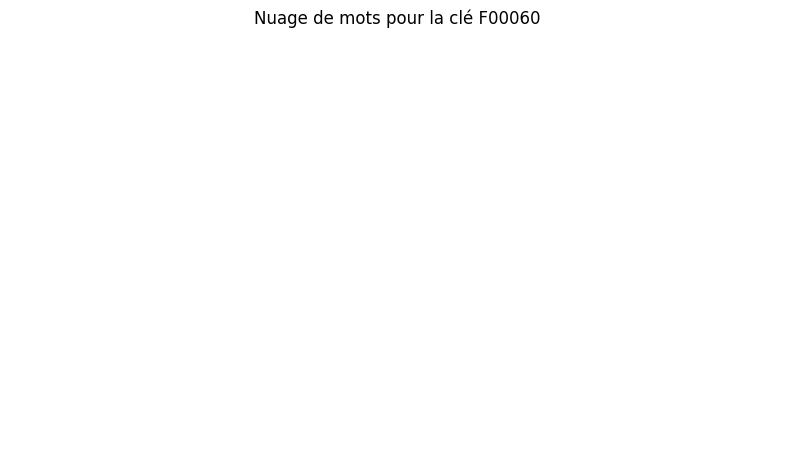

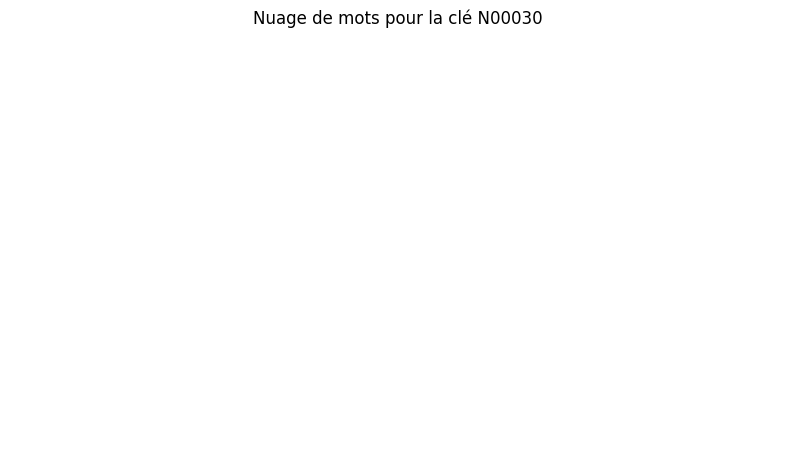

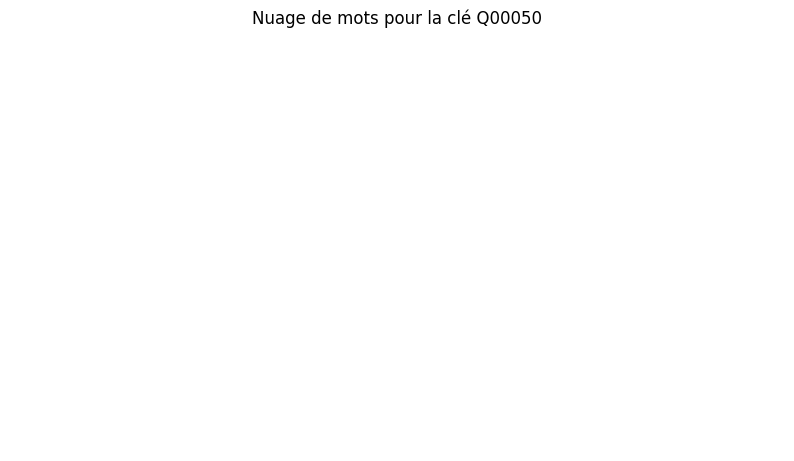

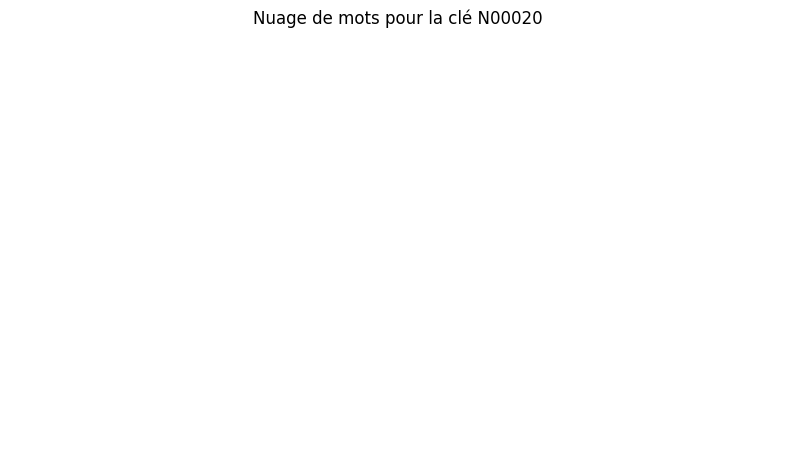

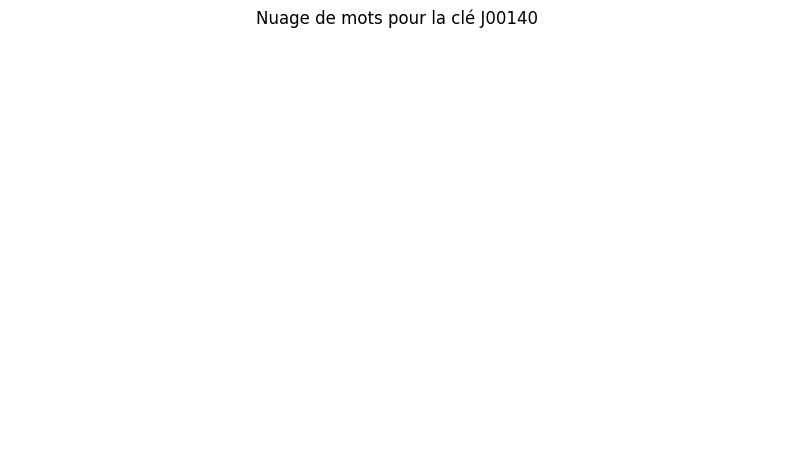

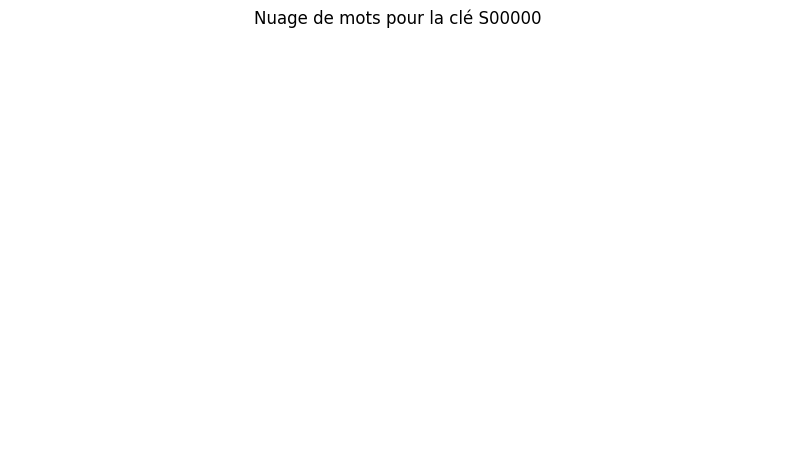

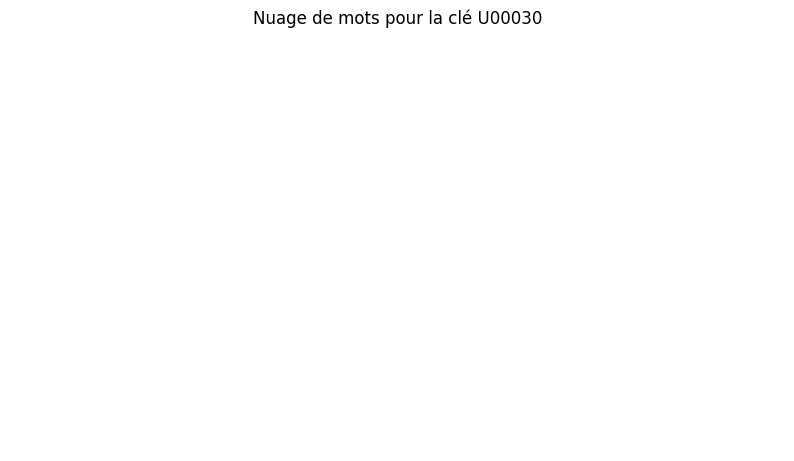

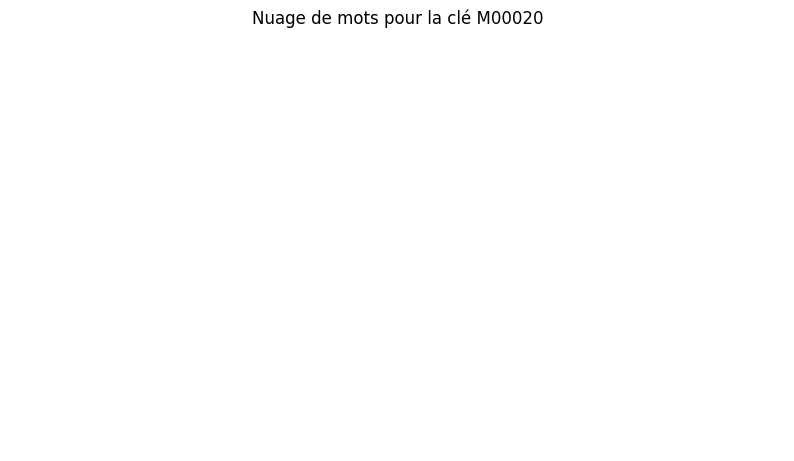

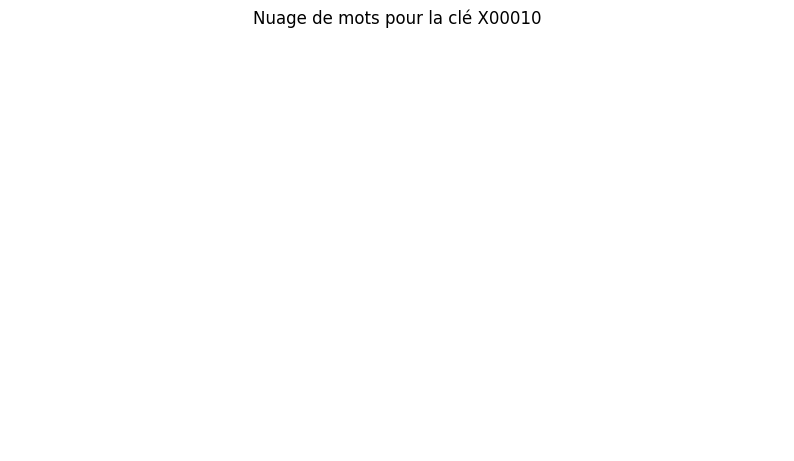

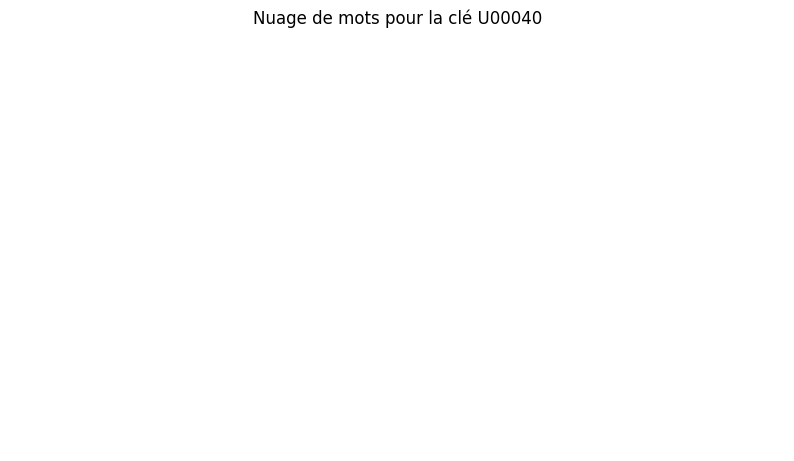

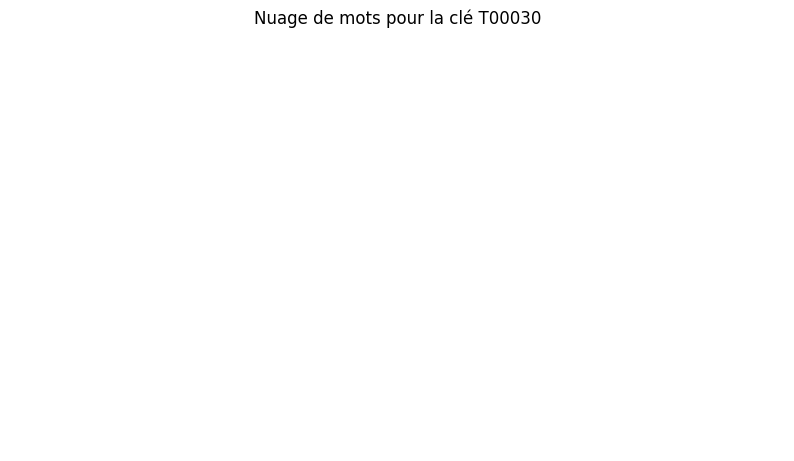

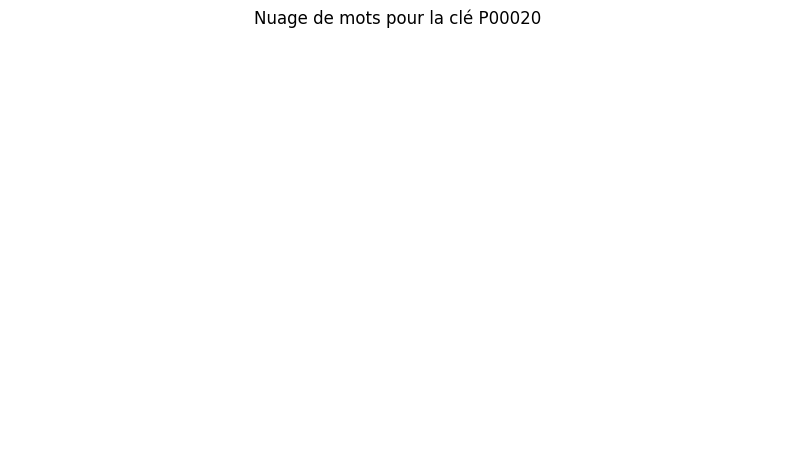

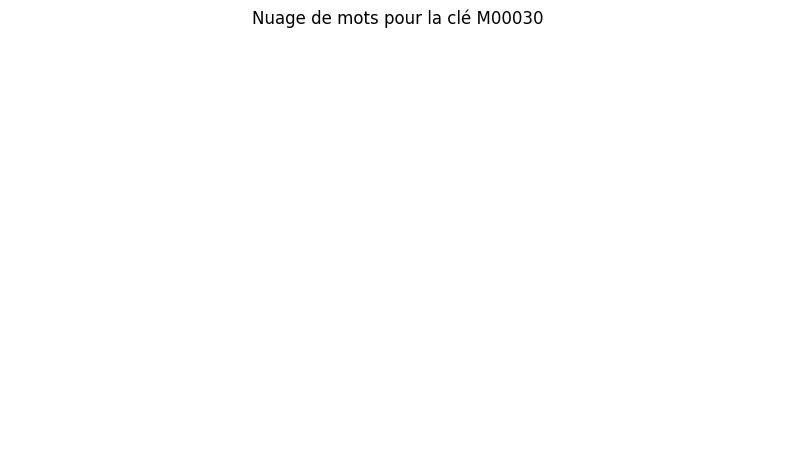

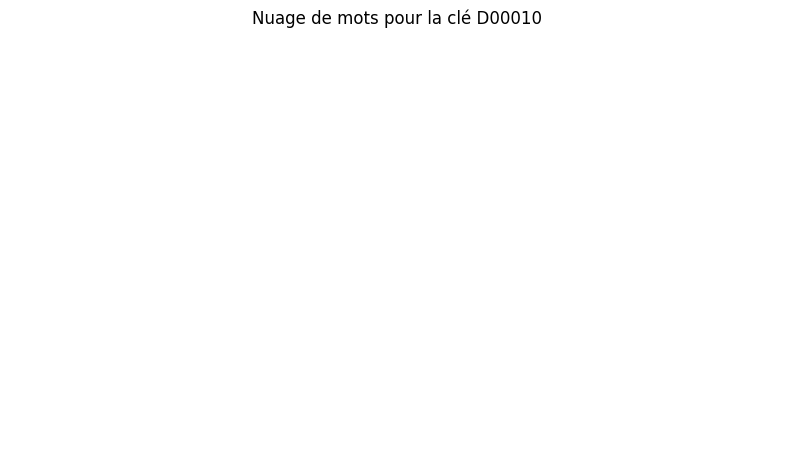

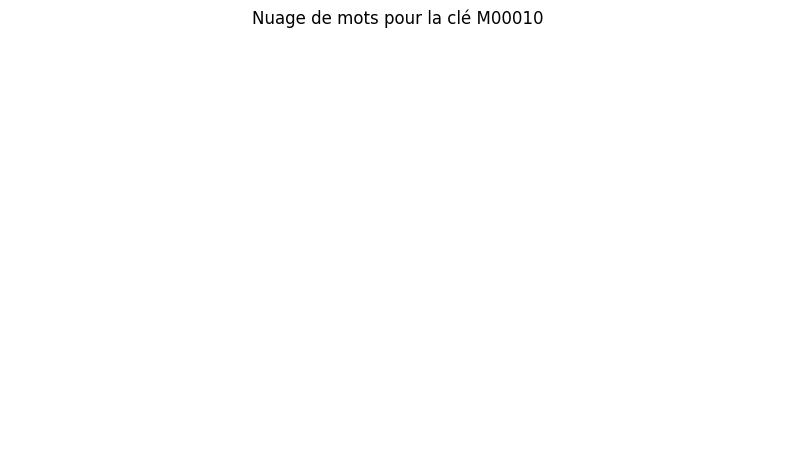

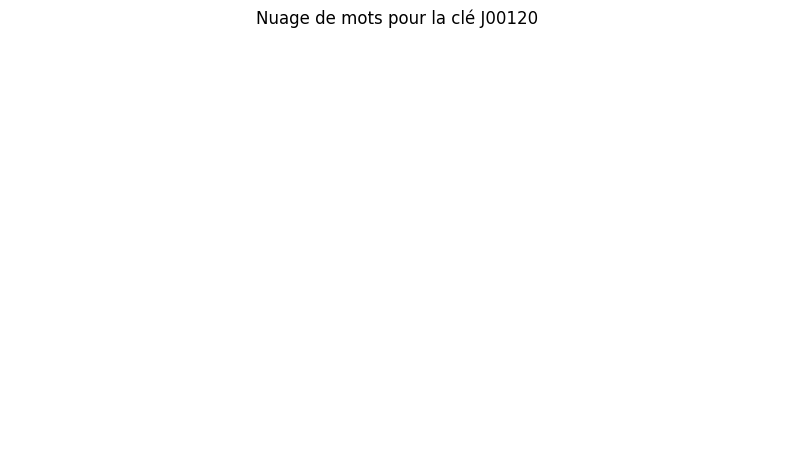

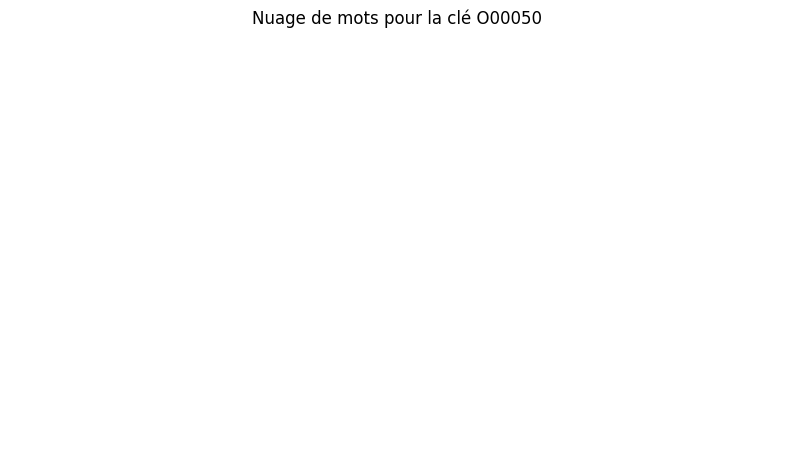

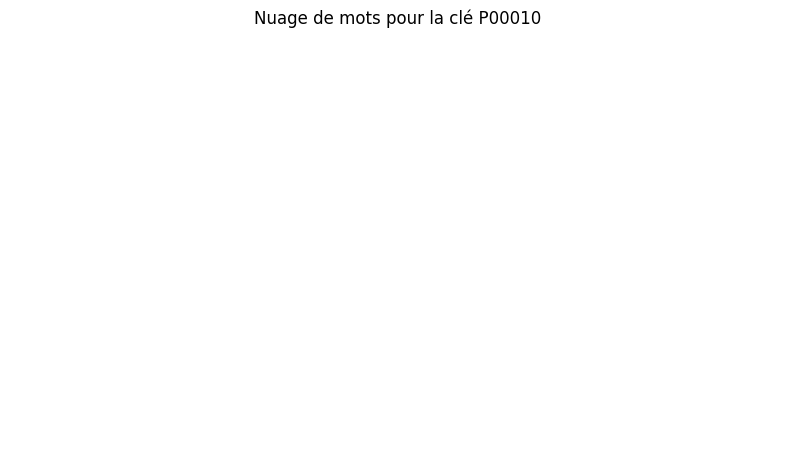

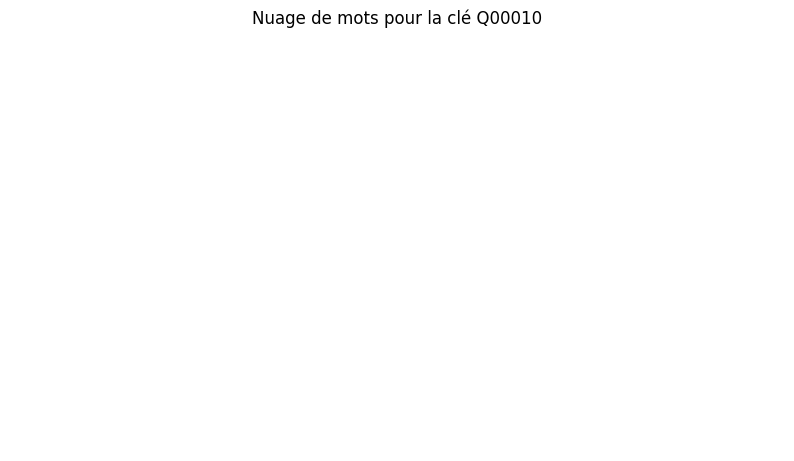

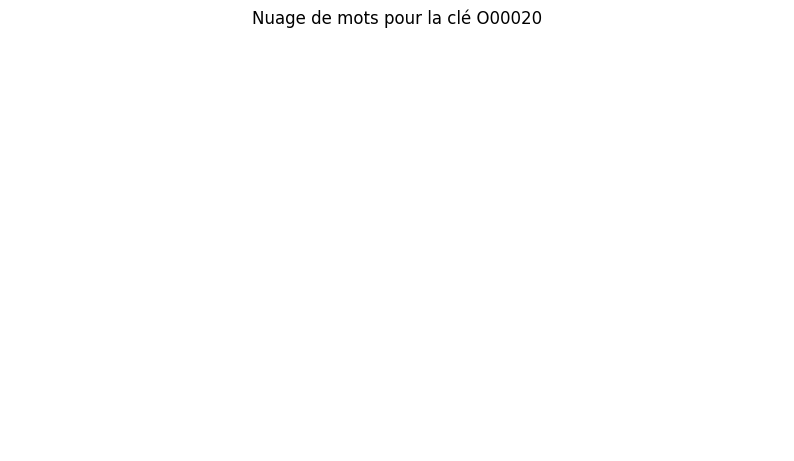

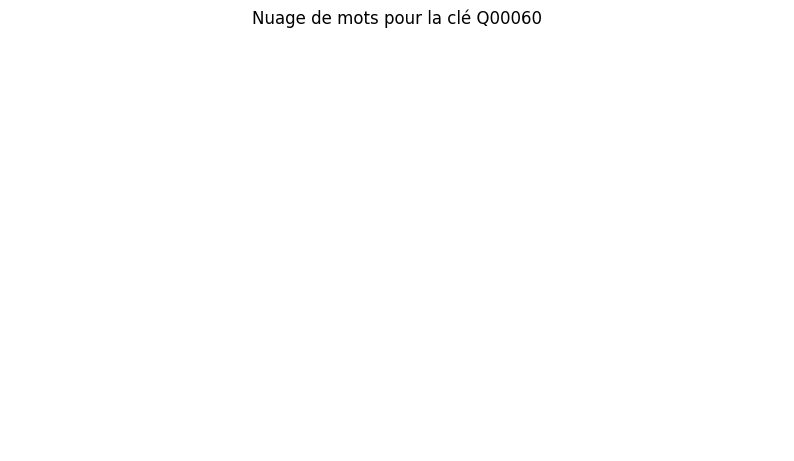

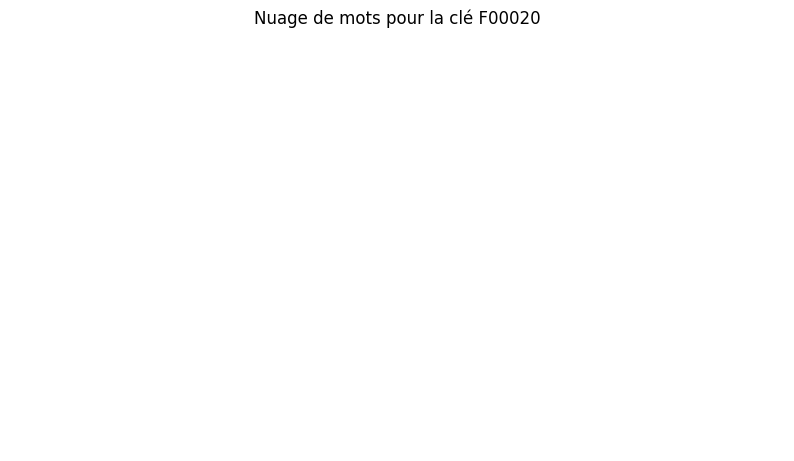

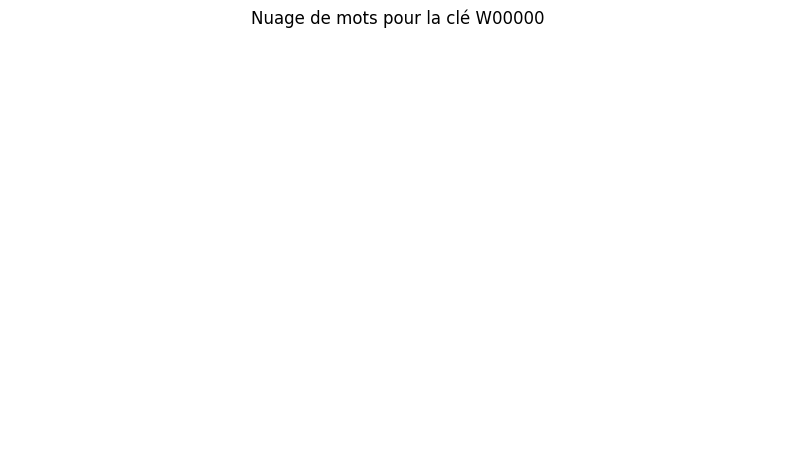

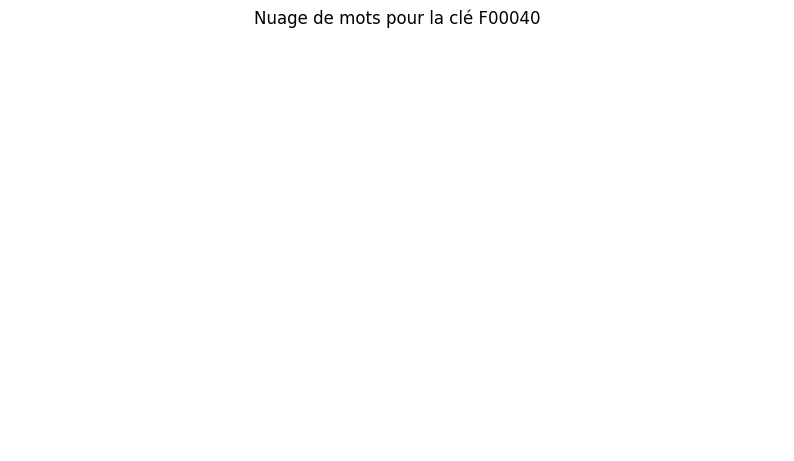

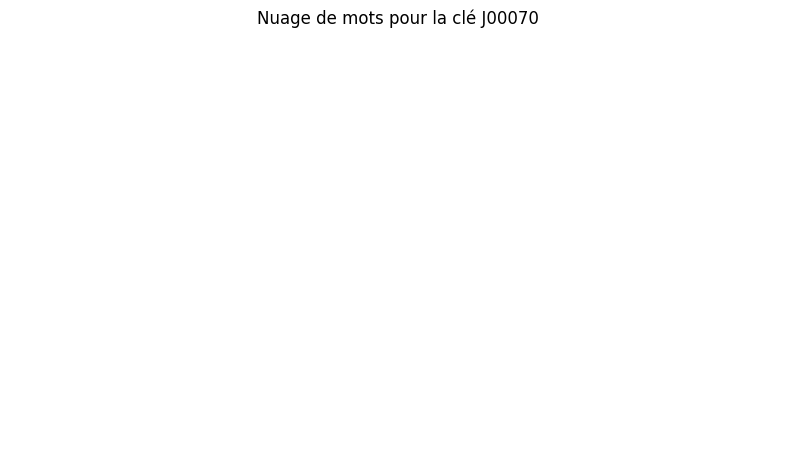

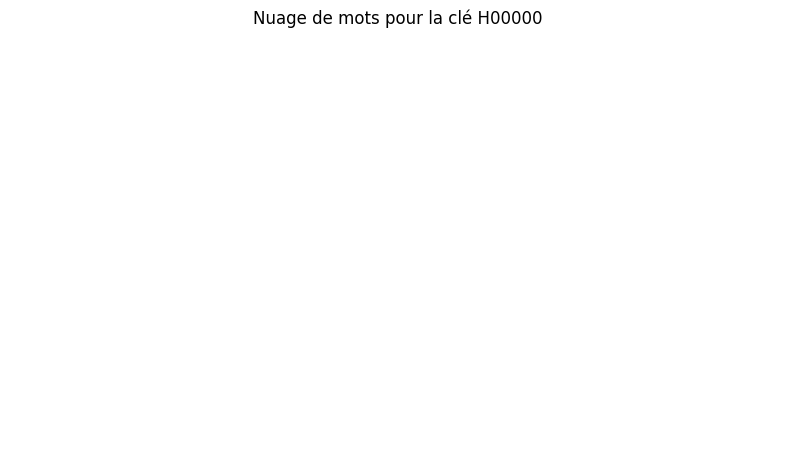

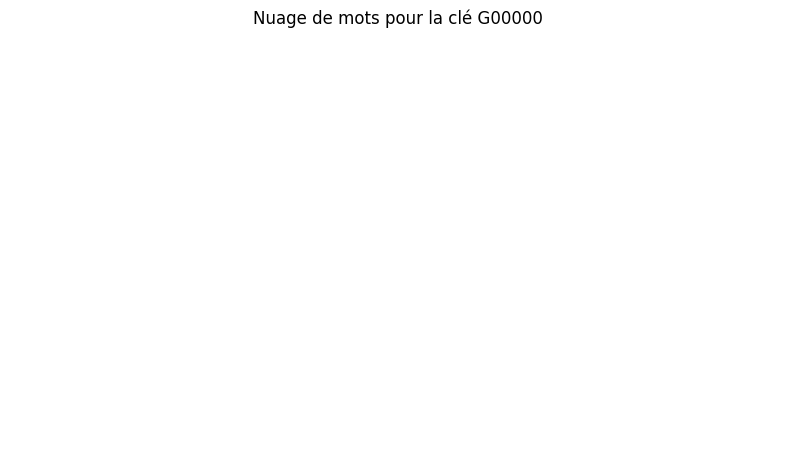

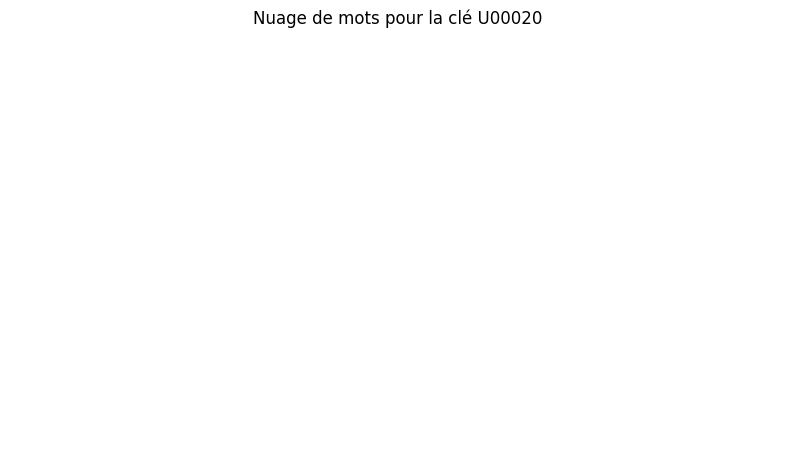

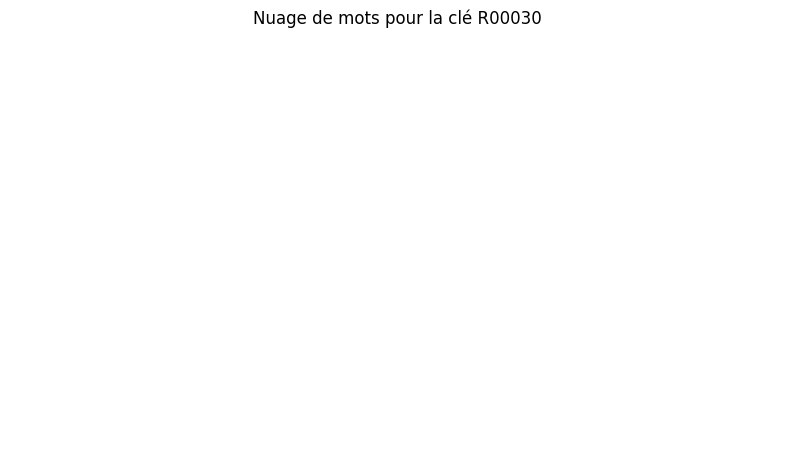

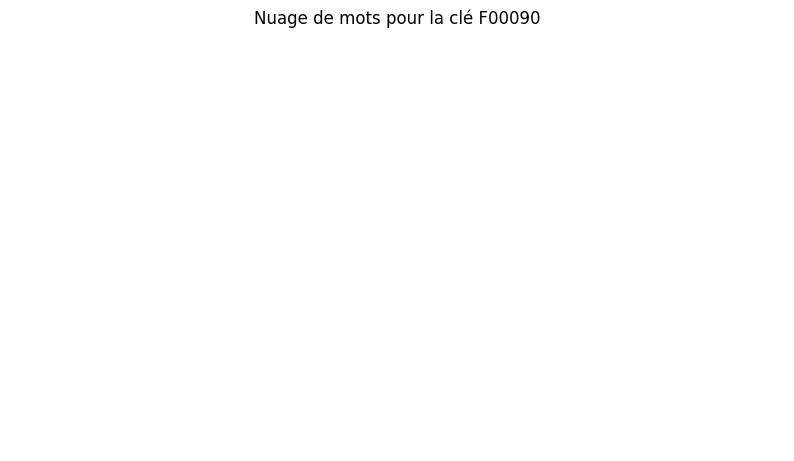

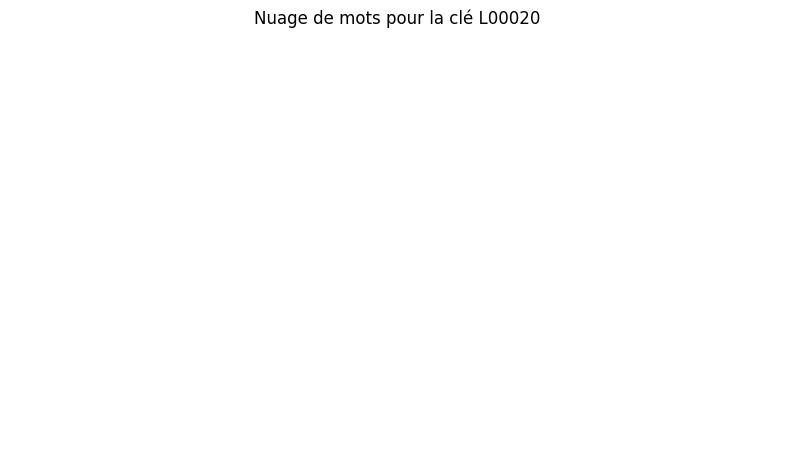

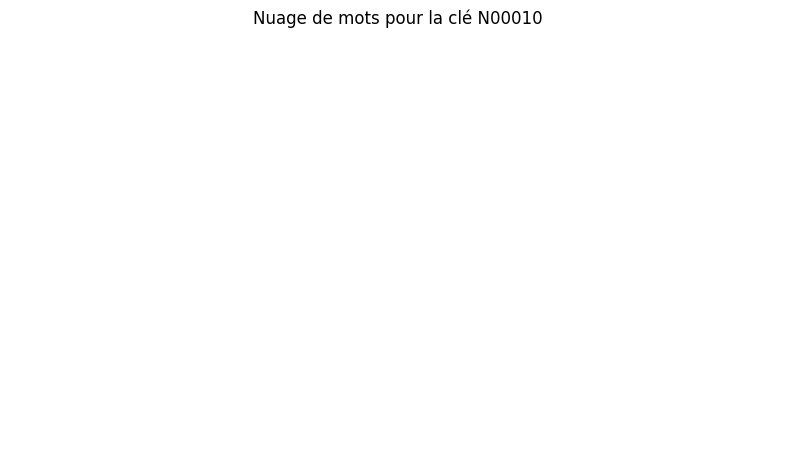

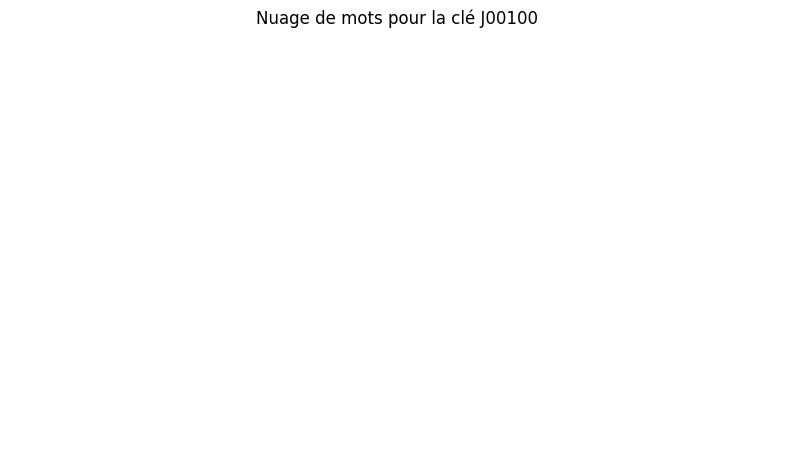

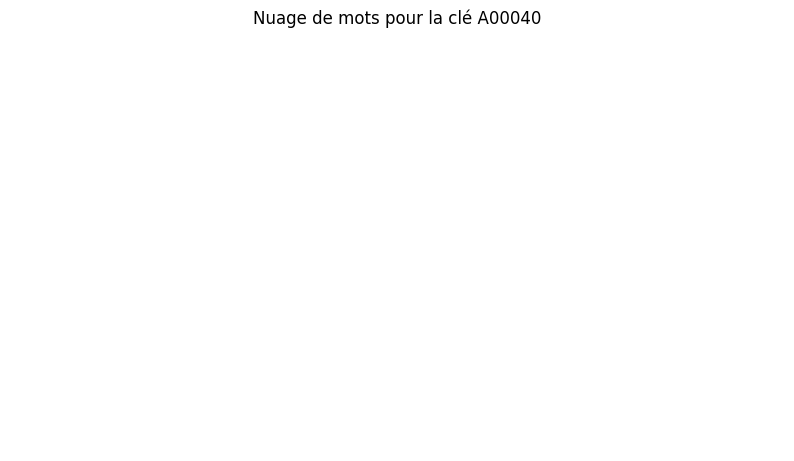

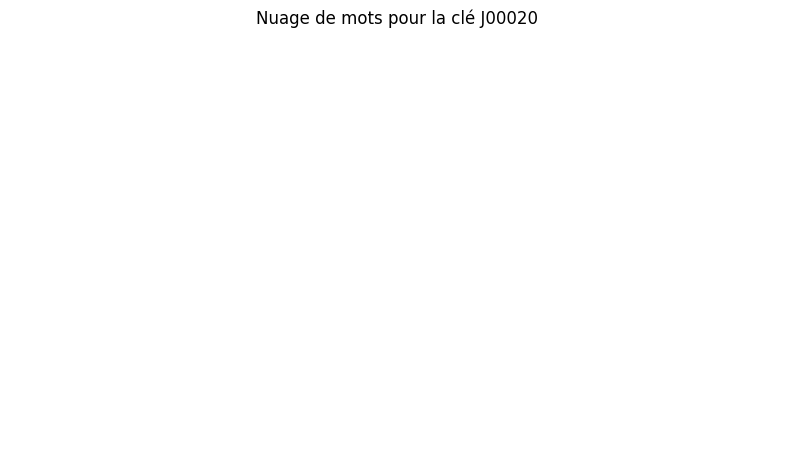

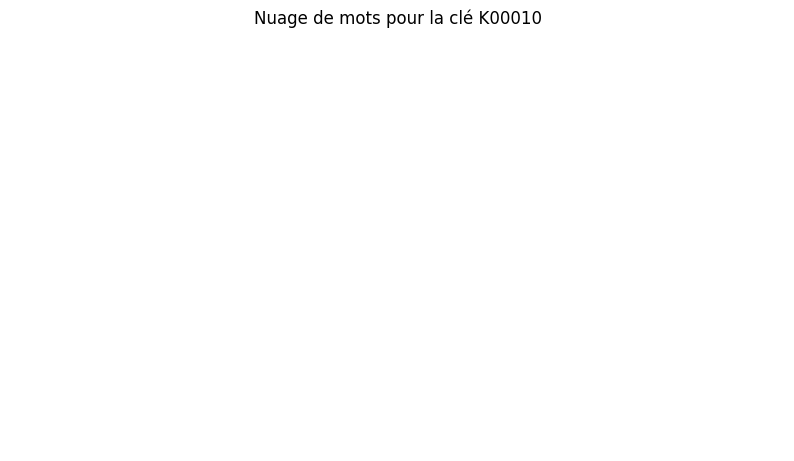

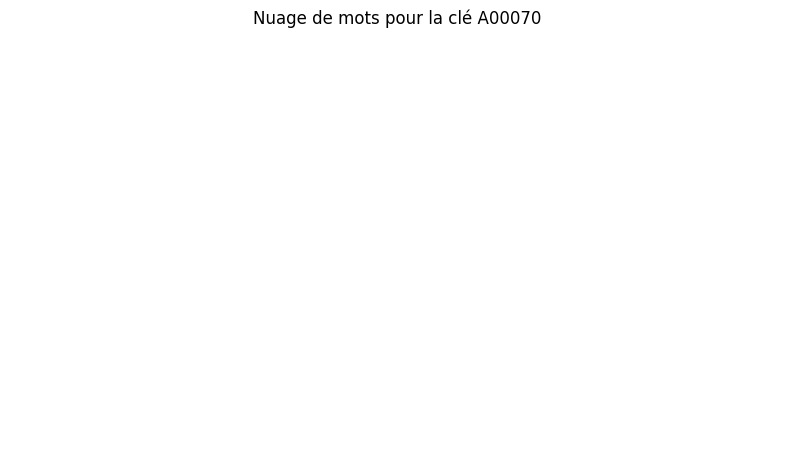

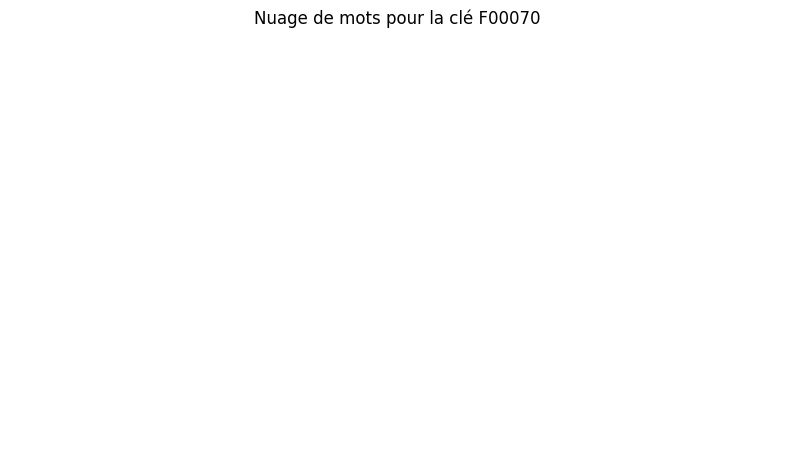

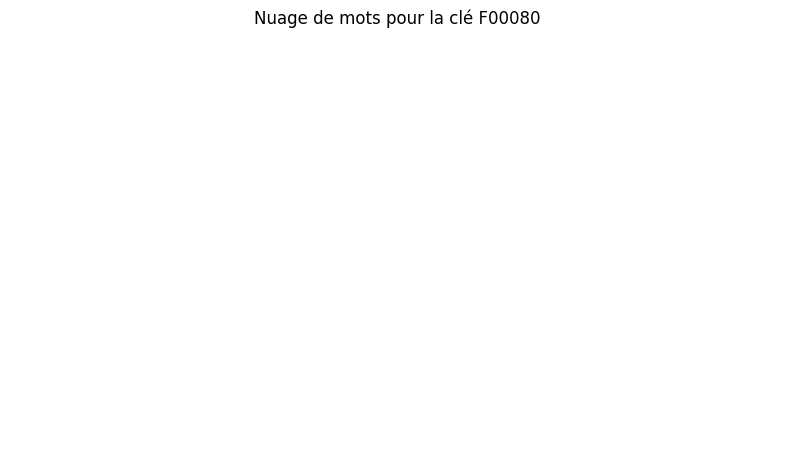

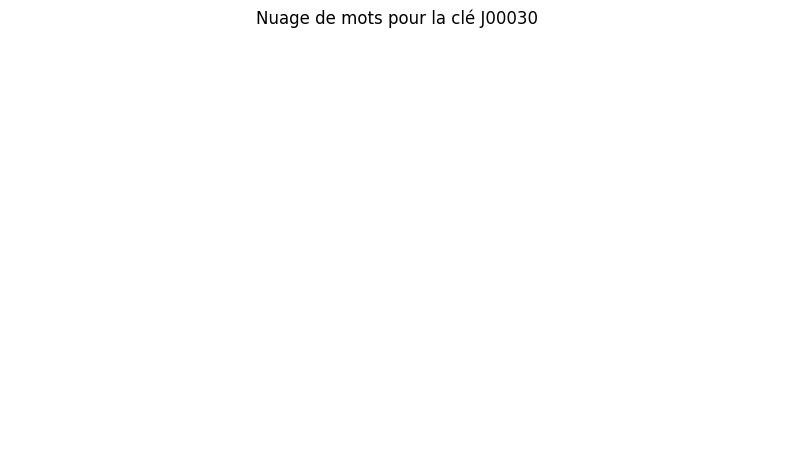

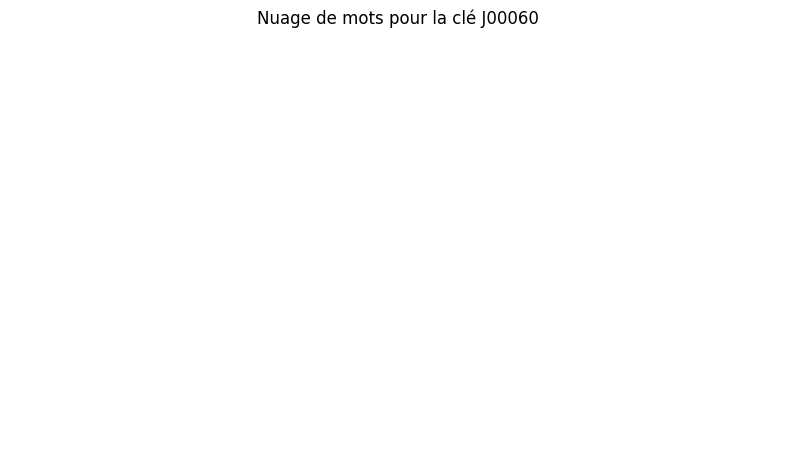

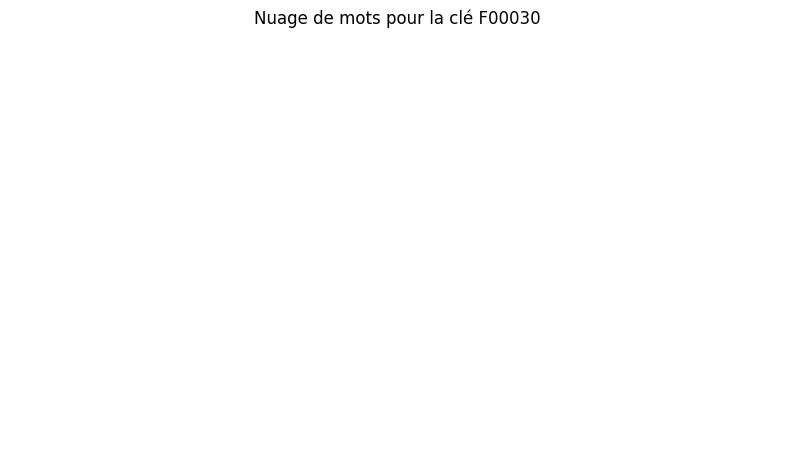

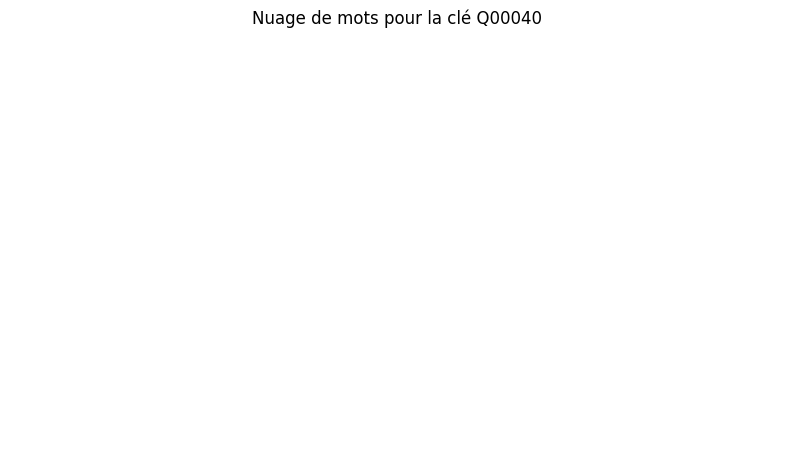

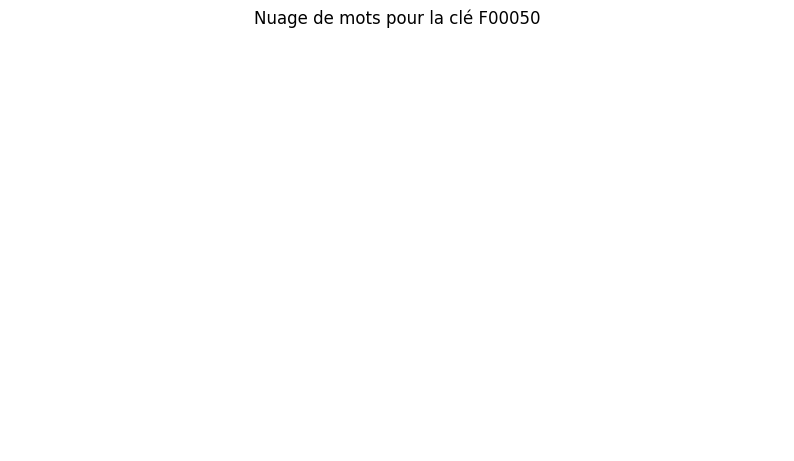

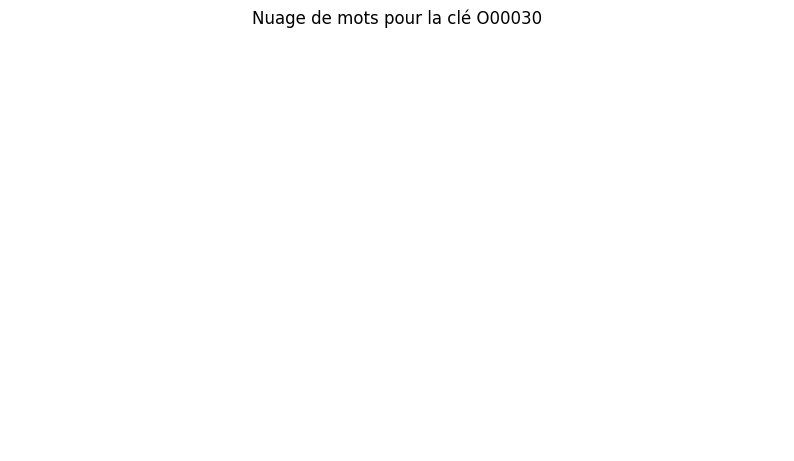

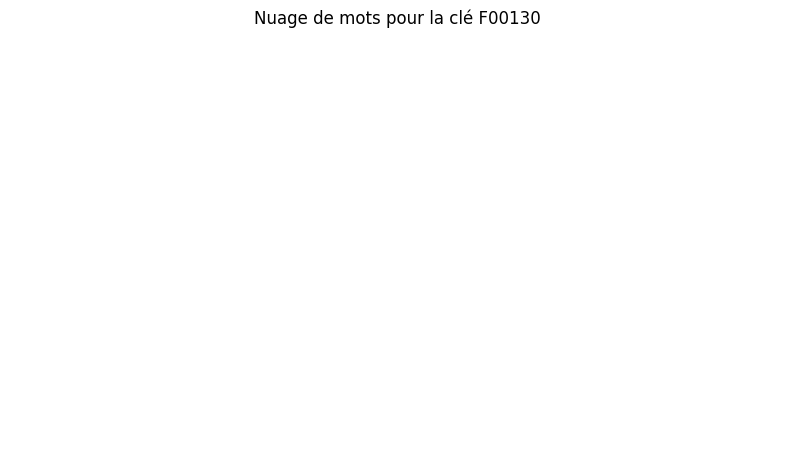

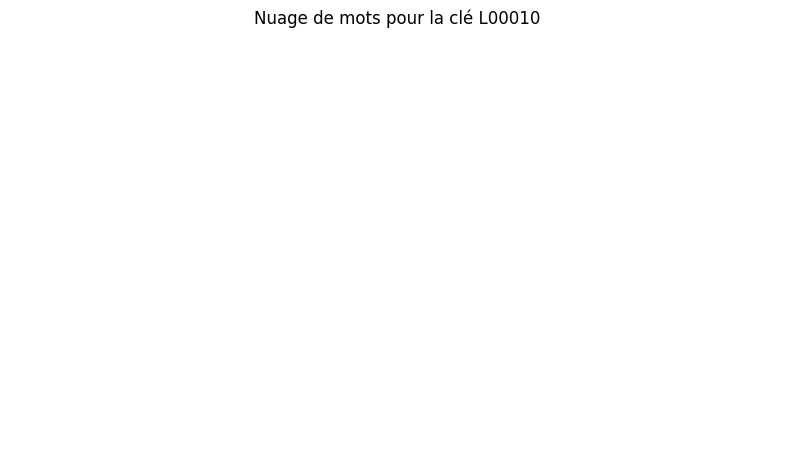

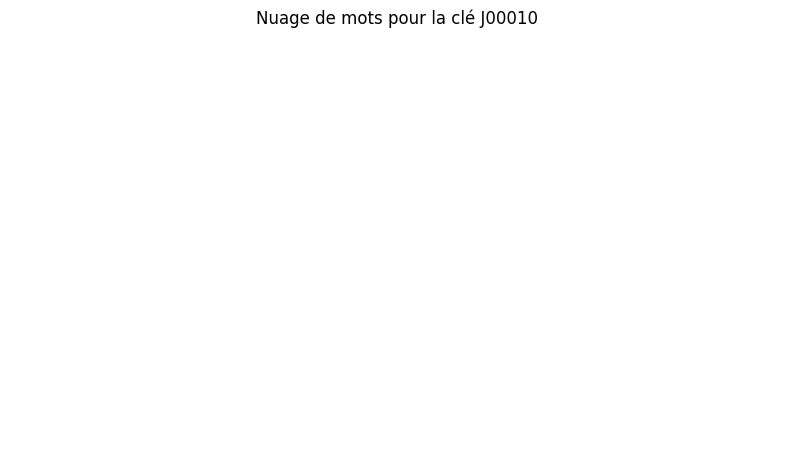

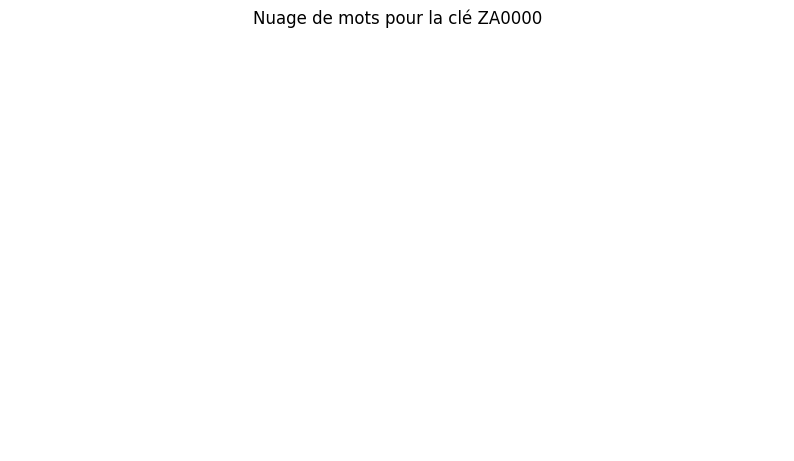

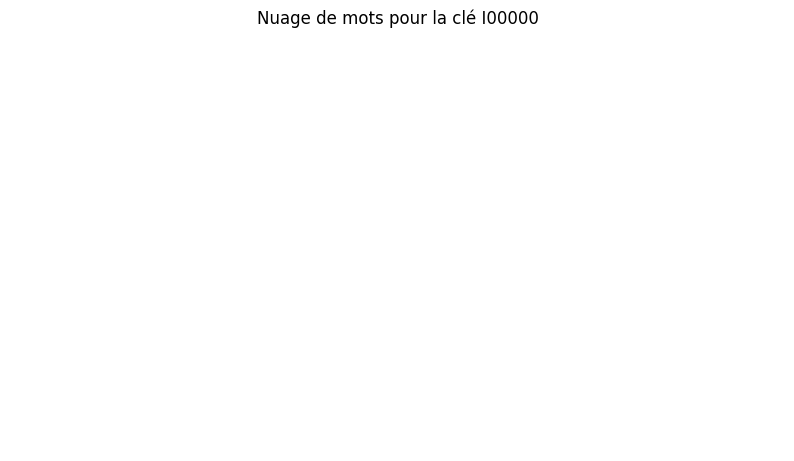

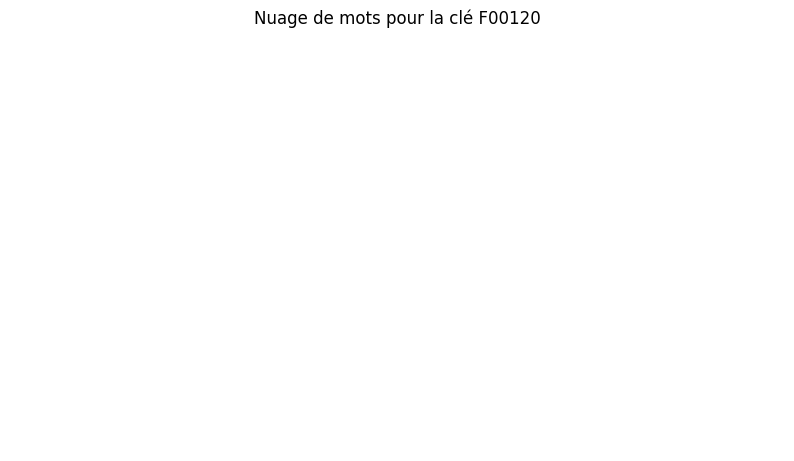

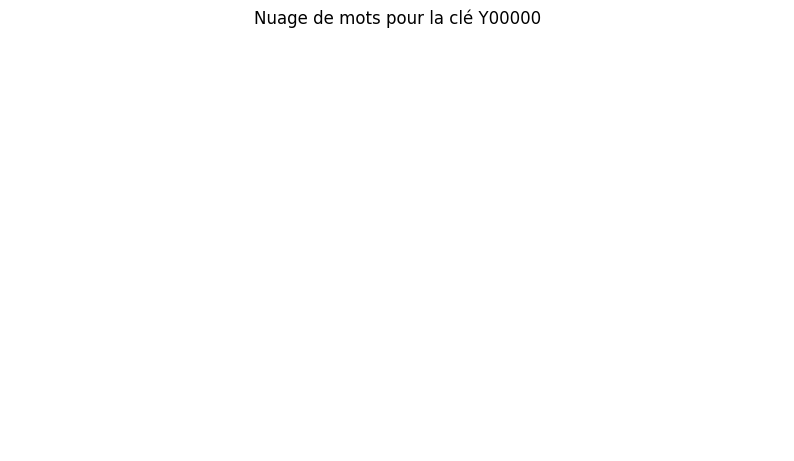

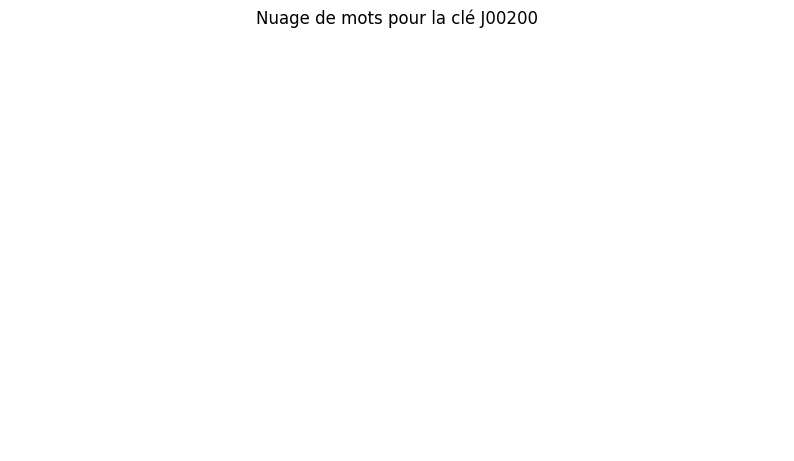

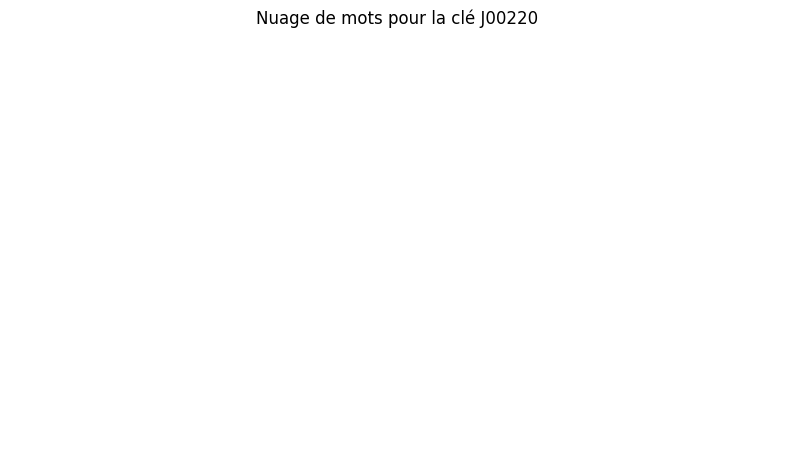

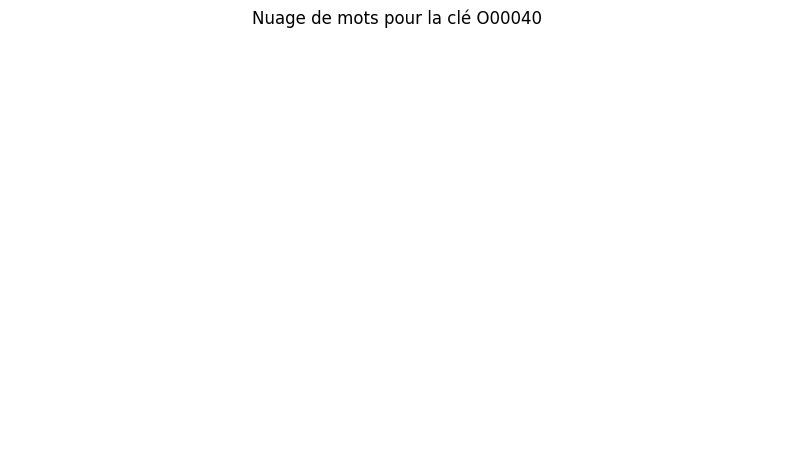

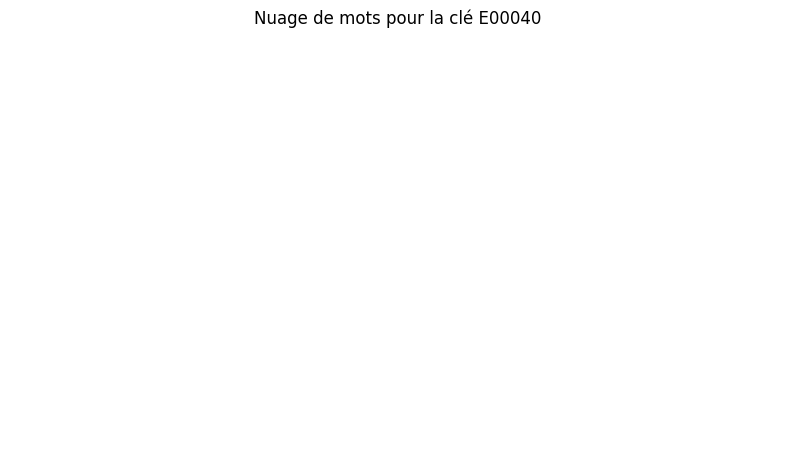

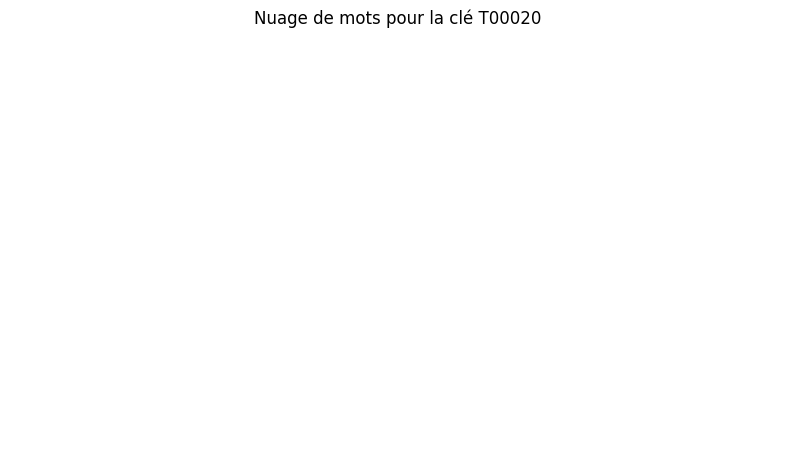

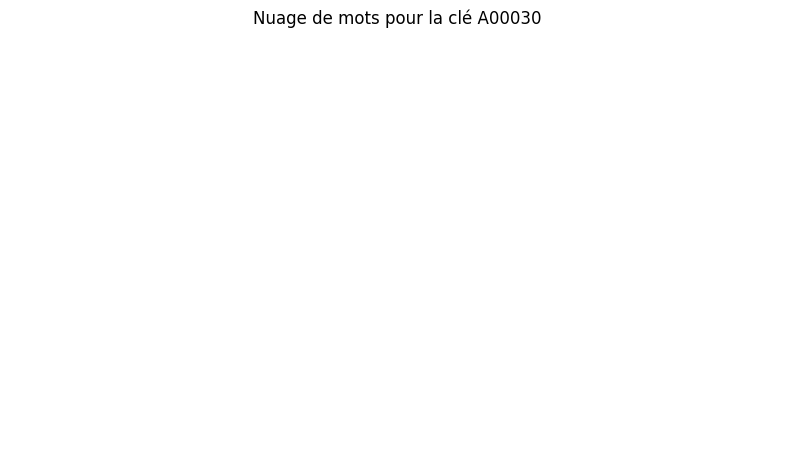

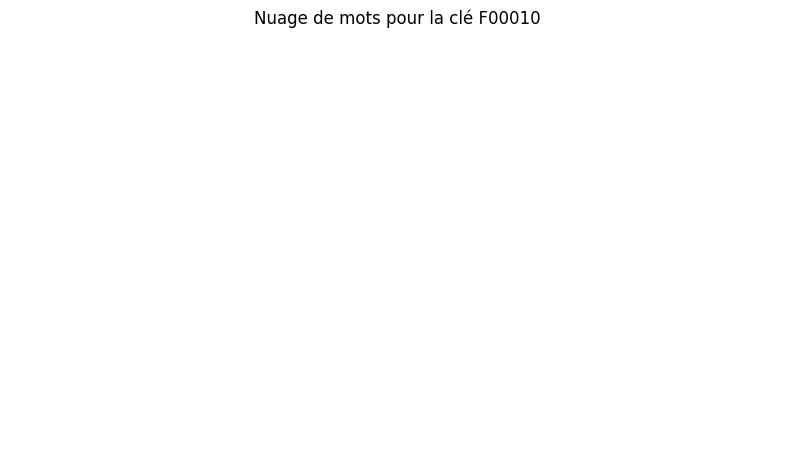

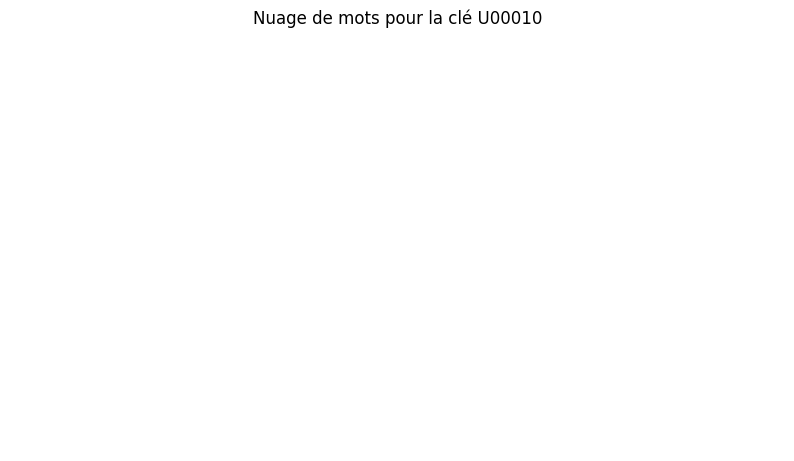

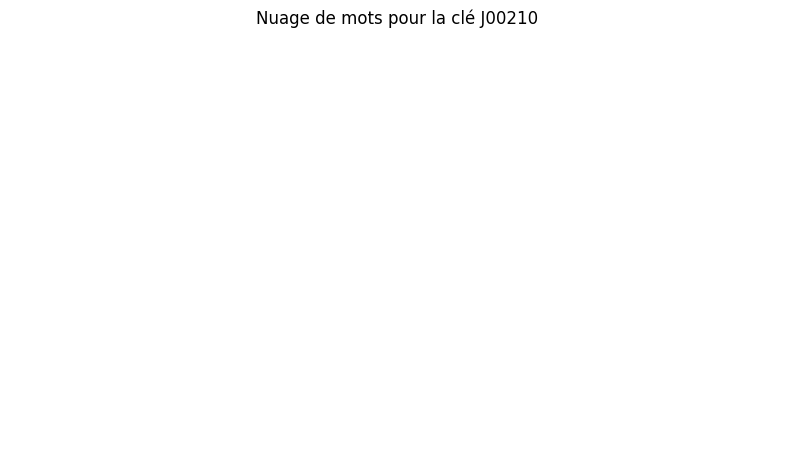

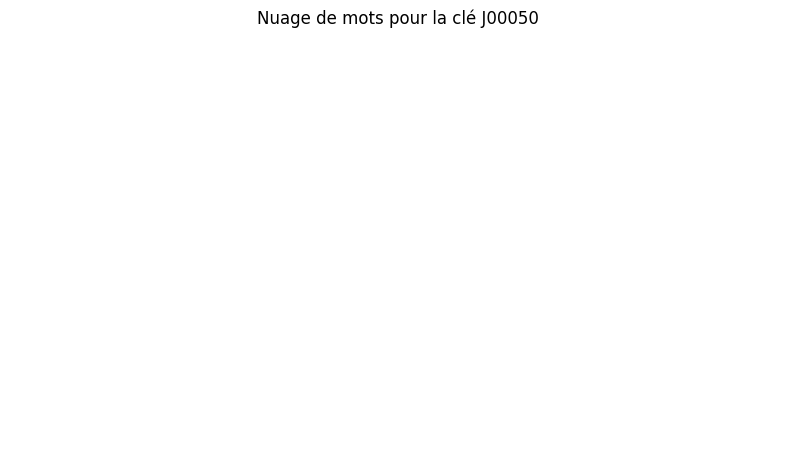

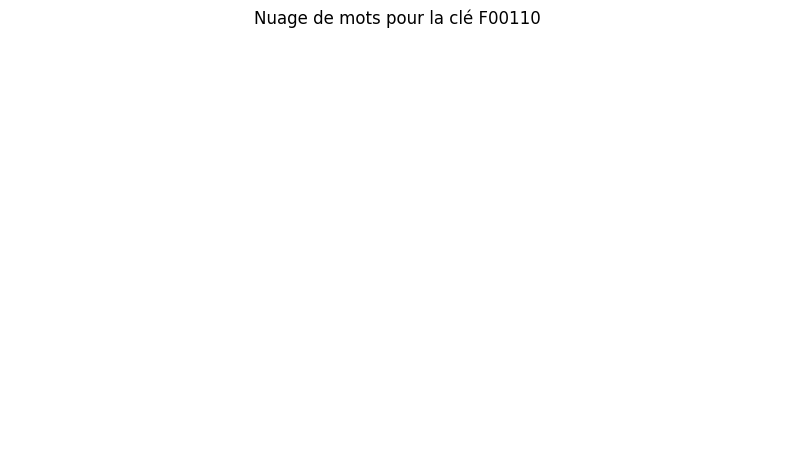

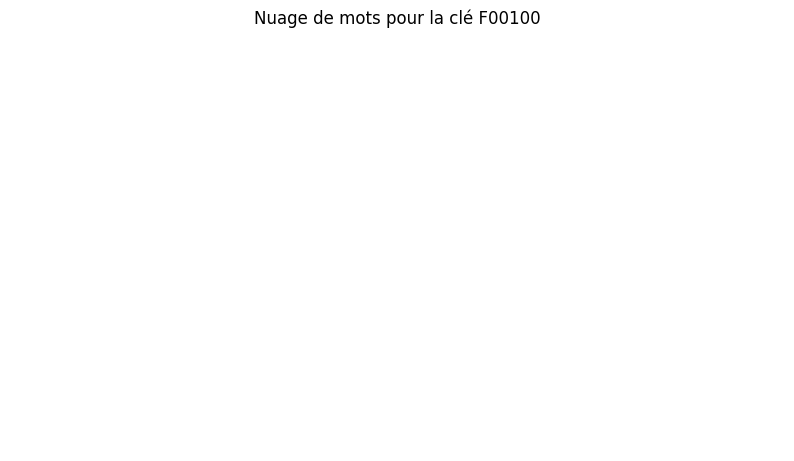

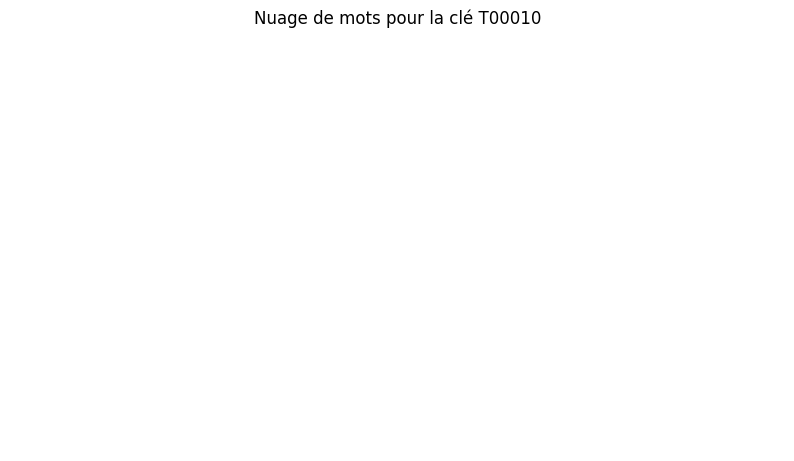

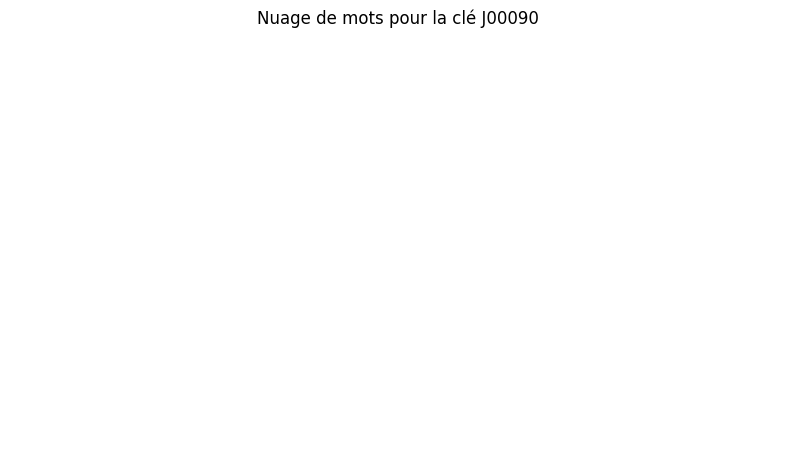

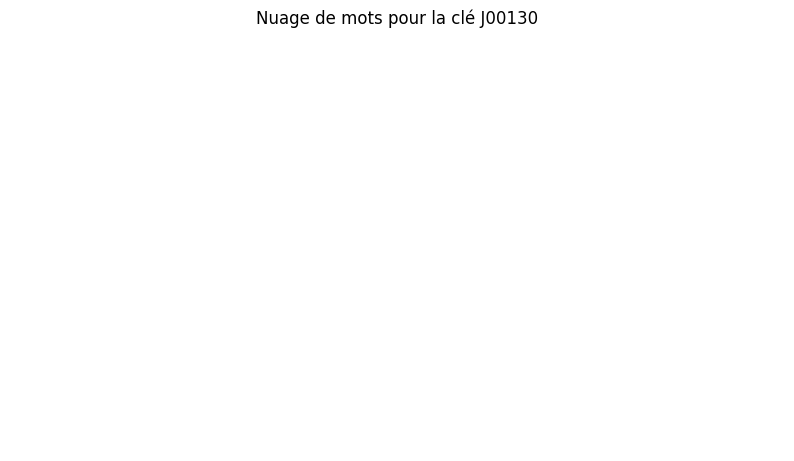

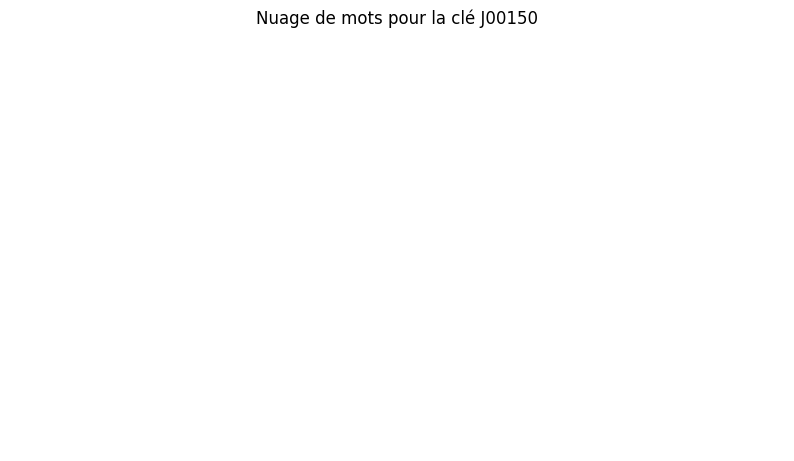

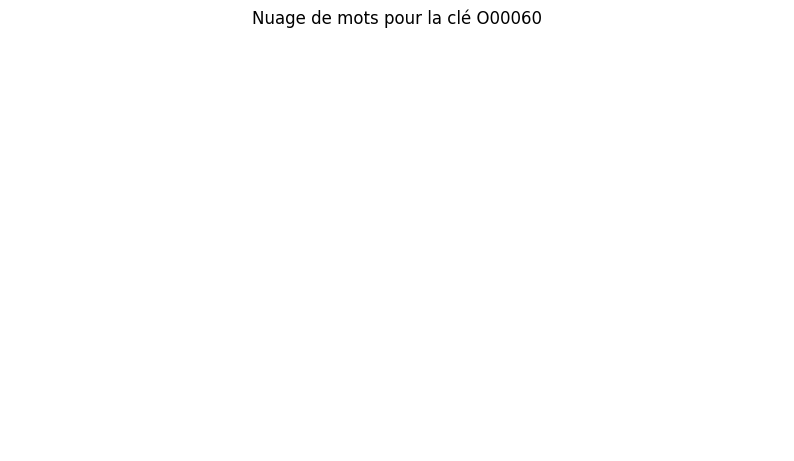

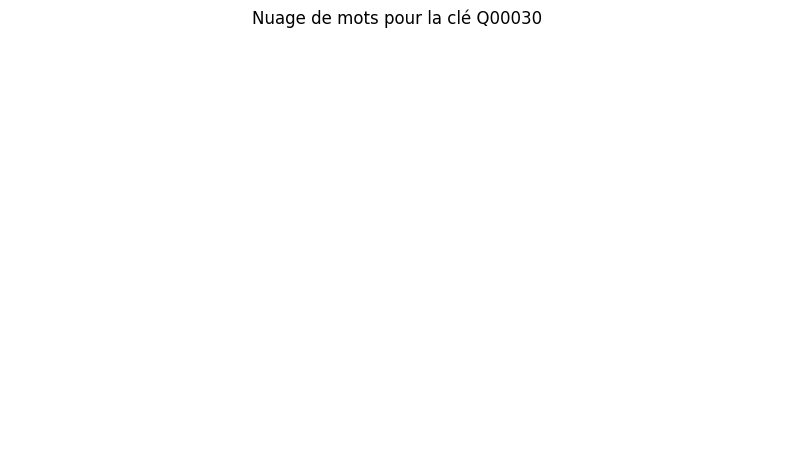

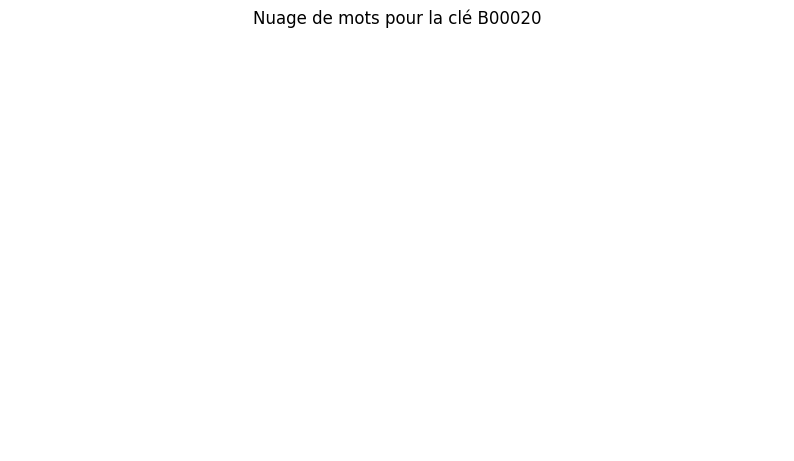

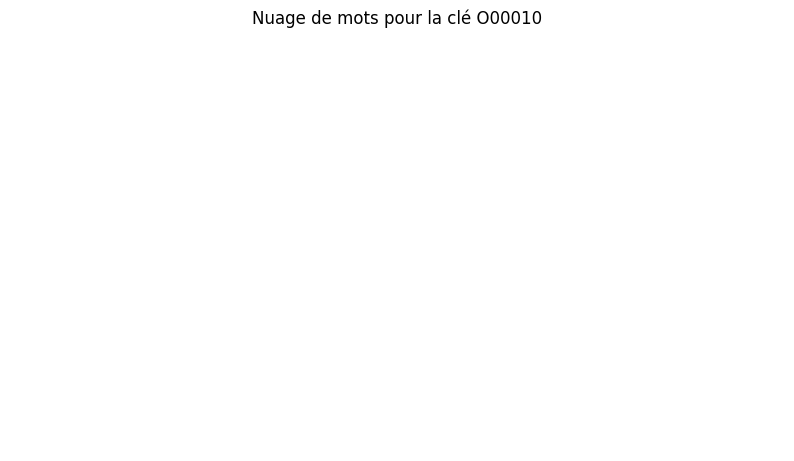

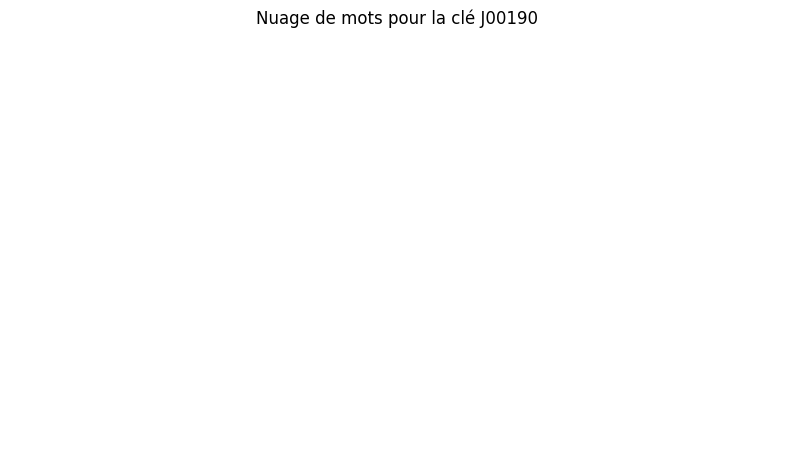

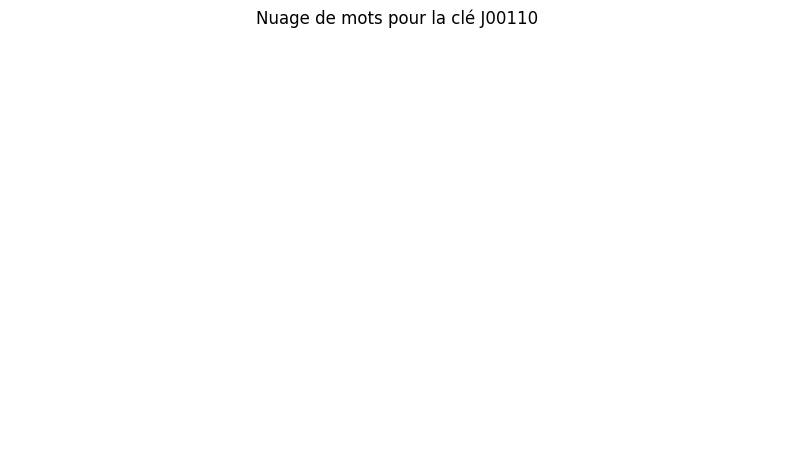

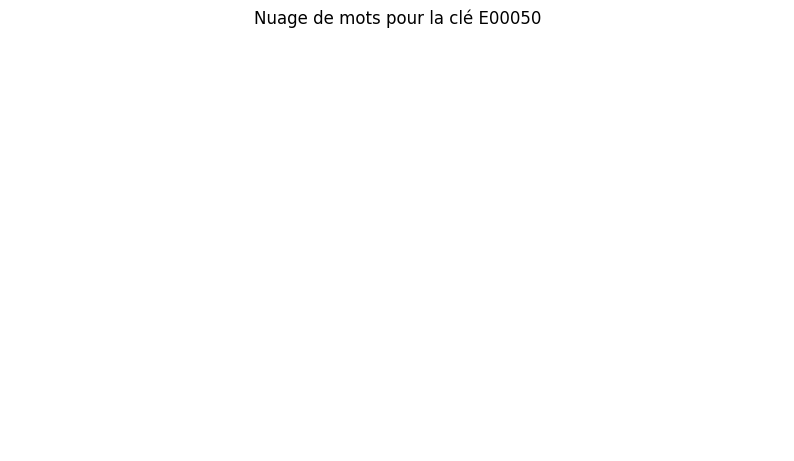

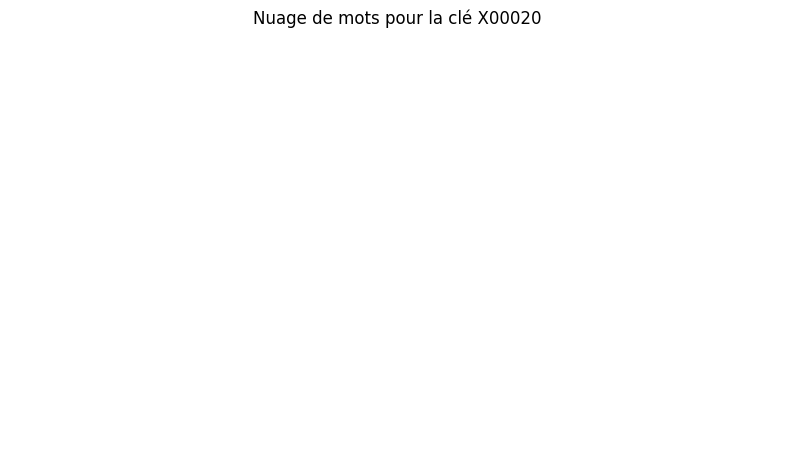

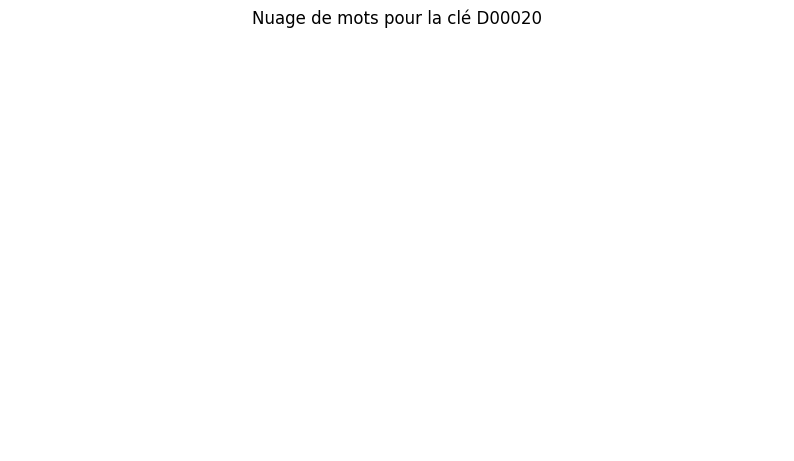

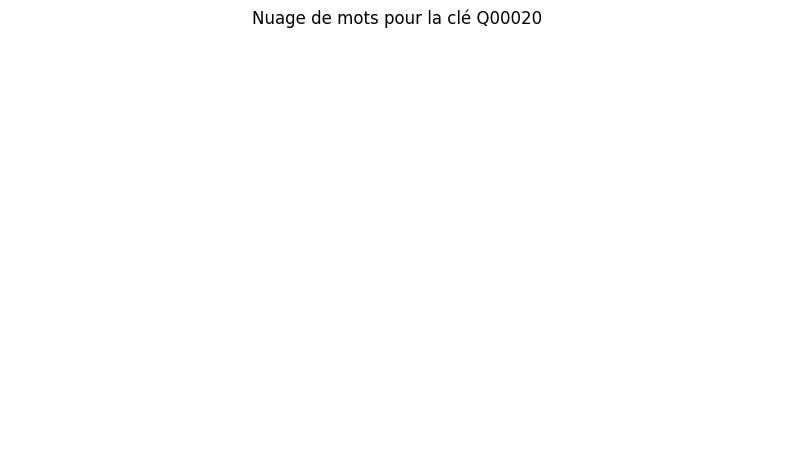

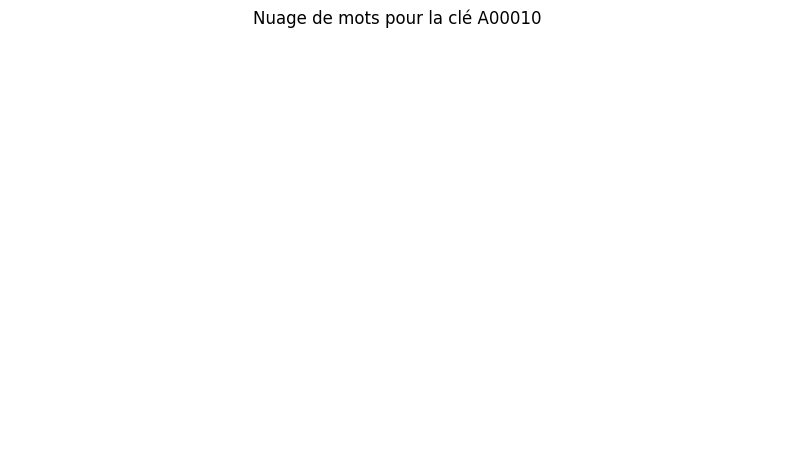

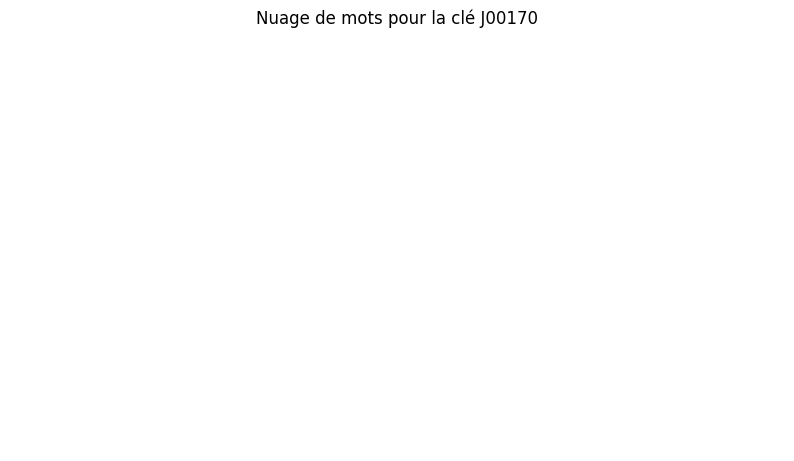

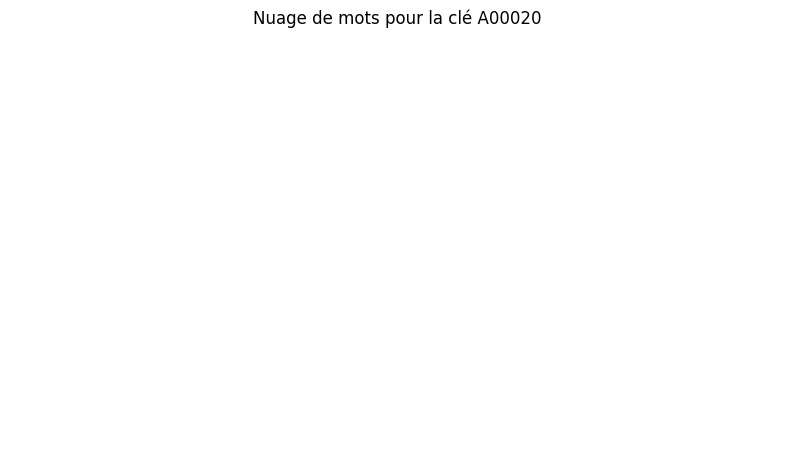

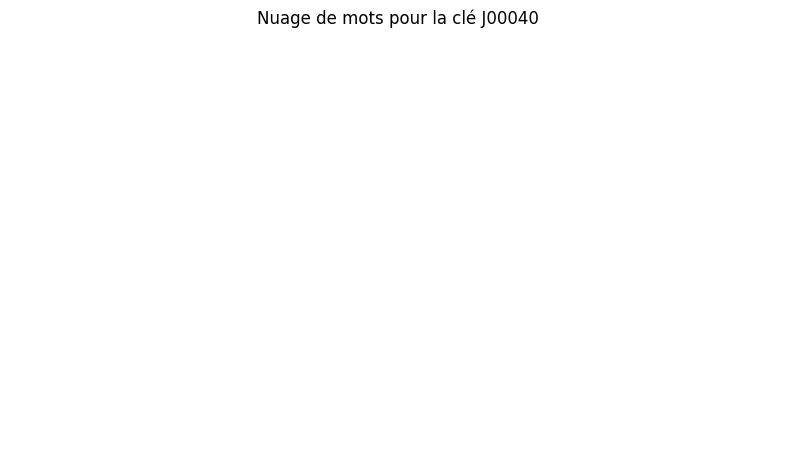

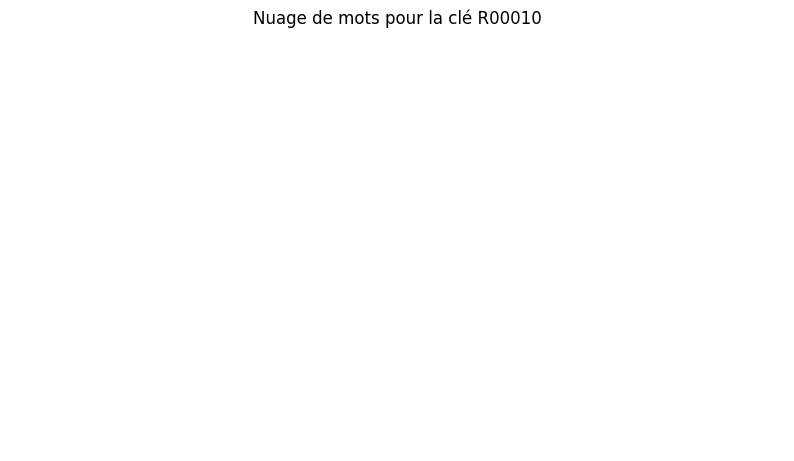

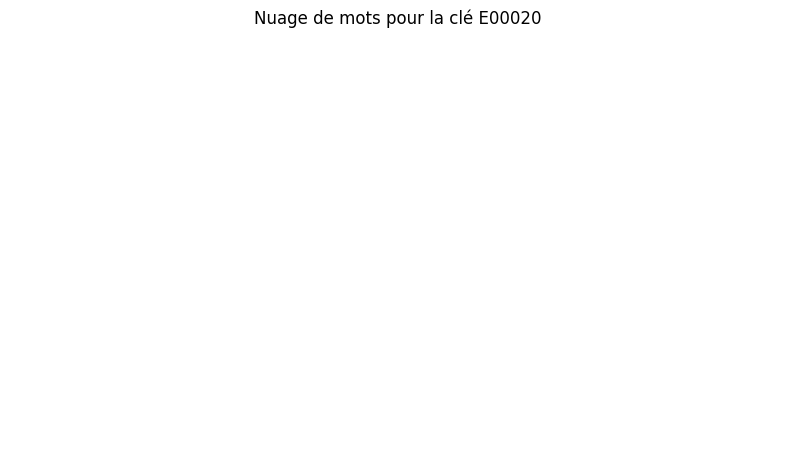

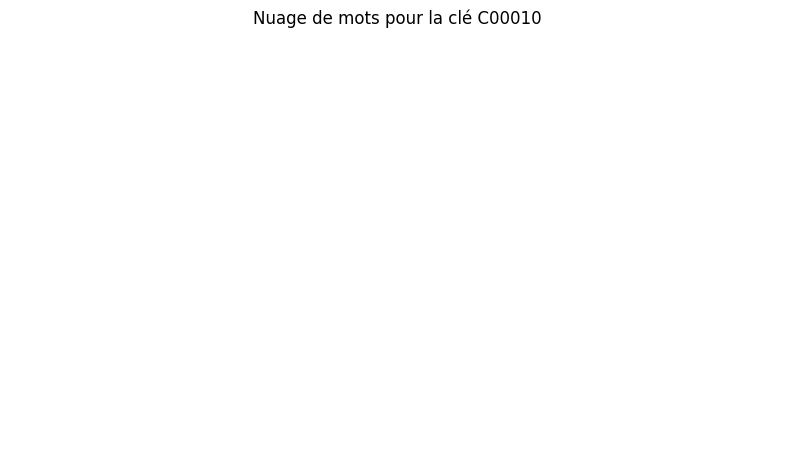

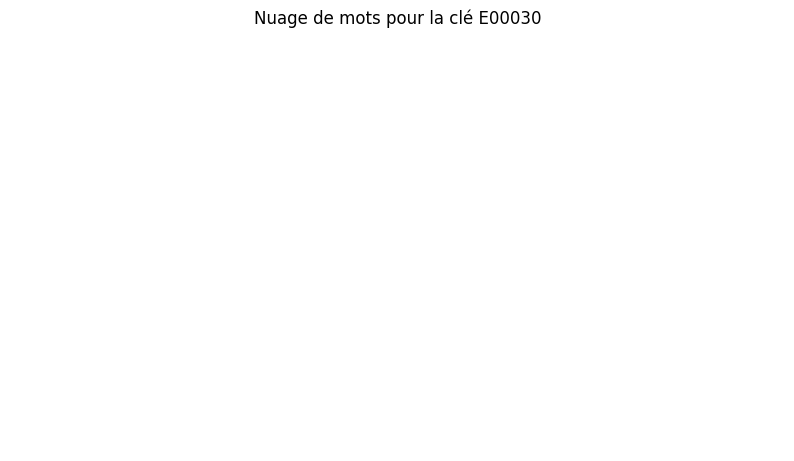

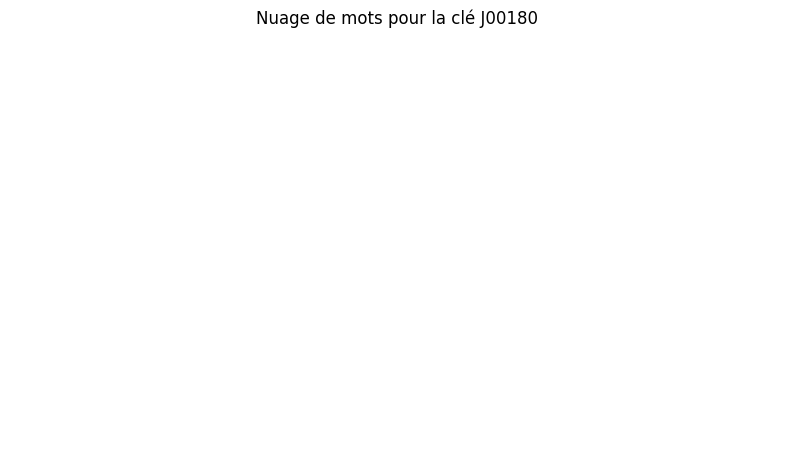

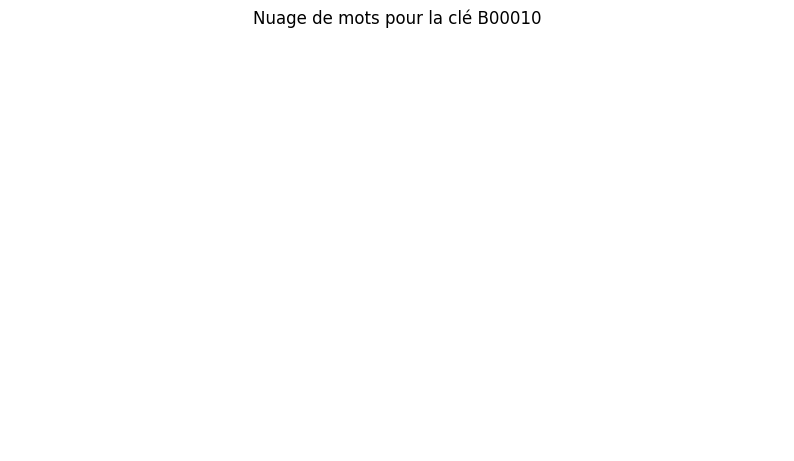

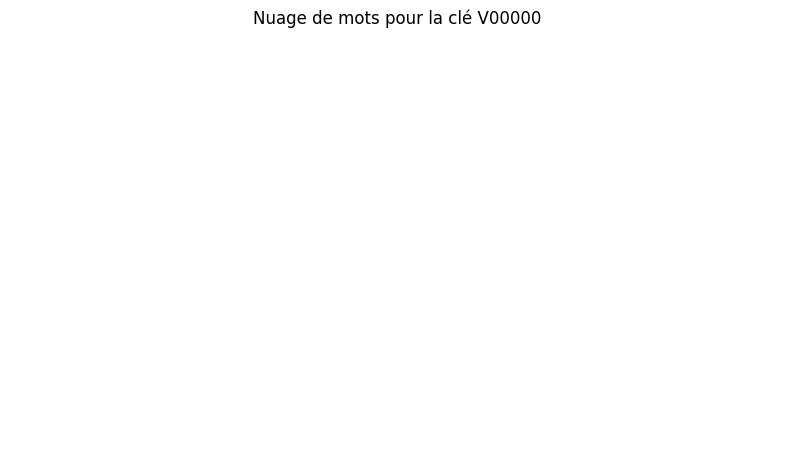

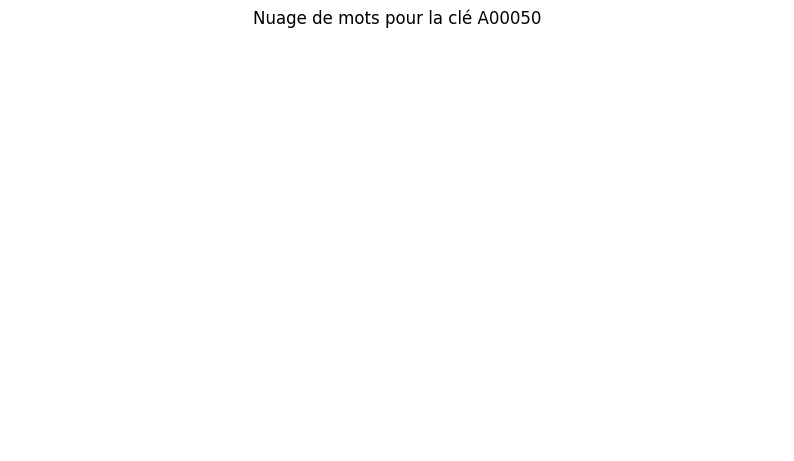

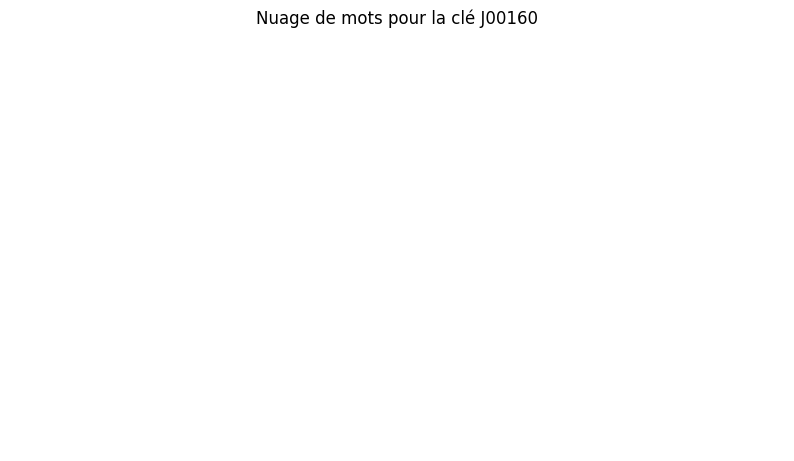

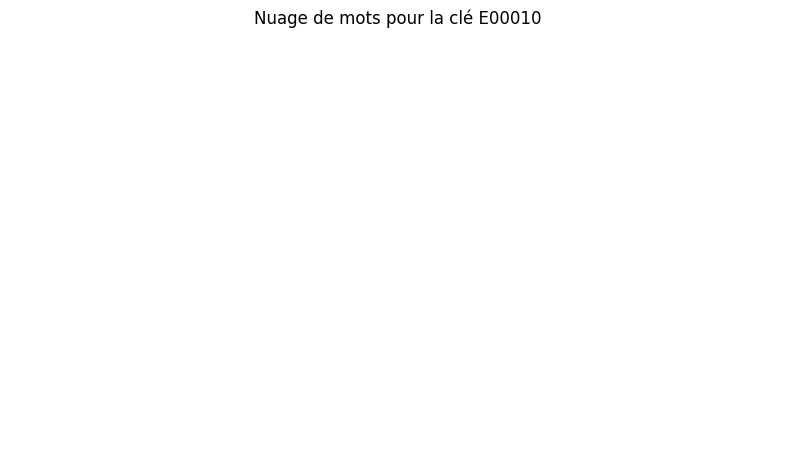

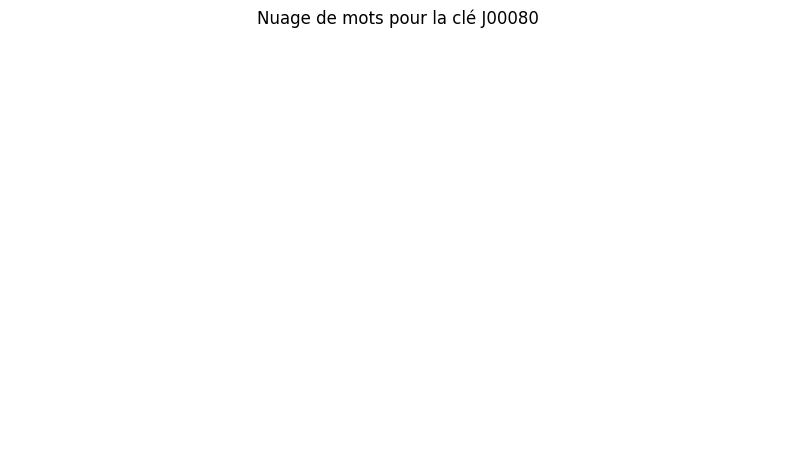

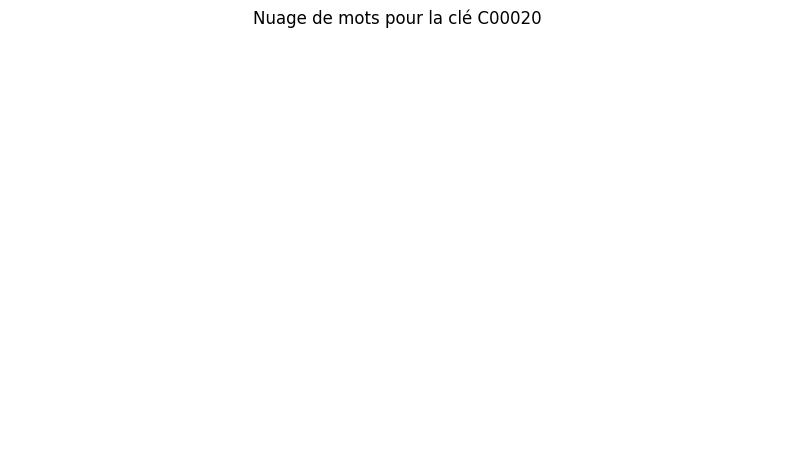

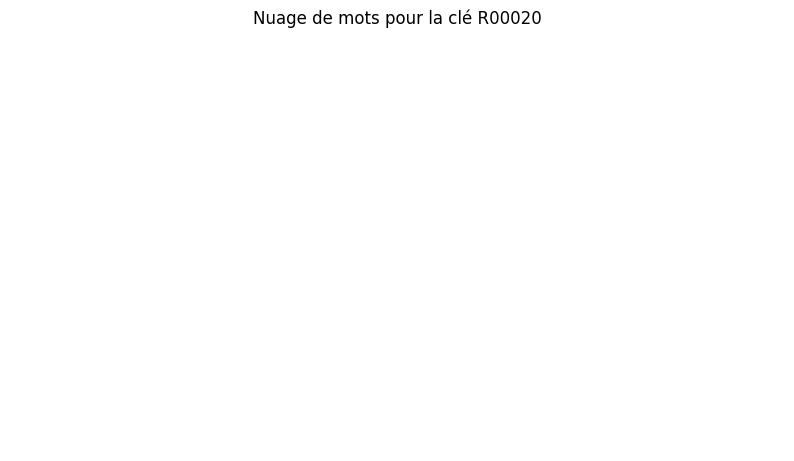

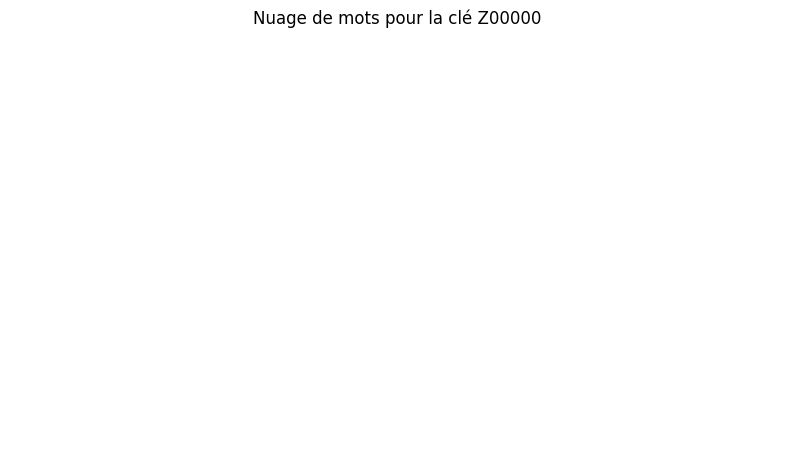

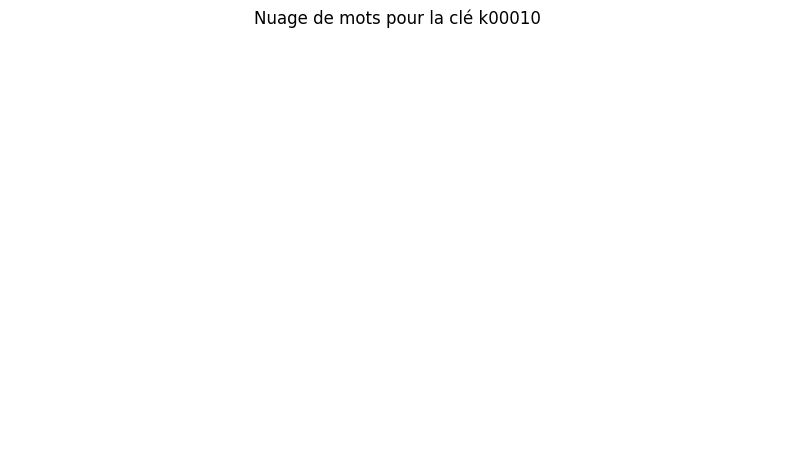

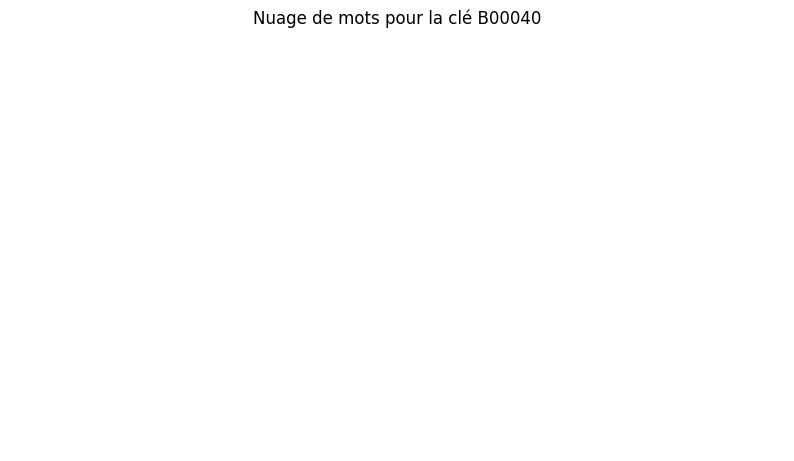

In [21]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Parcourir chaque clé et générer un nuage de mots pour chaque groupe

for key, activities in Dicto.items():
    
    # Combiner les activités en une seule chaîne de texte
    text = ' '.join(activities)
    
    # Créer un objet WordCloud
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Afficher le nuage de mots
    
    plt.figure(figsize=(10, 5))
    #plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nuage de mots pour la clé {key}', pad=30)
    plt.axis('off')
    plt.show()


In [ ]:


from collections import Counter

def get_top_n_frequent_words(word_list, top_n):
    # Compter les fréquences des mots
    word_counts = Counter(word_list)
    
    # Trier les mots par fréquence en ordre décroissant et prendre les top_n
    most_common_words = word_counts.most_common(top_n)
    
    # Extraire les mots et les mettre dans un ensemble
    most_frequent_words_set = {word for word, count in most_common_words}
    
    return most_frequent_words_set

# Exemple de liste de mots
words = ["Python", "est", "génial", "Python", "utilisé", "pour", "analyse", "données", "machine", "apprentissage", "Python", "est", "intelligence", "données", "analyse", "apprentissage", "génial"]

# Obtenir les 5 mots les plus fréquents sous forme d'ensemble
top_n = 5
most_frequent_words_set = get_top_n_frequent_words(words, top_n)
print(most_frequent_words_set)

